## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot


In [2]:
master_var = pd.read_csv(r'D:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data\MASTER_VARIABLES.csv')

In [3]:
vul_scores = pd.read_csv(r'D:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data-audit\factor_scores_l1_vulnerability.csv')

## Define Variables

In [4]:
master_var

,object_id,district,rc_area,timeperiod,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,CIDF_tenders_awarded_value,...,revenue_ci_y.1,district_3_y.1,net_sown_area_in_hac,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density
0,101,KOKRAJHAR,1069,2021_04,0.00,0.0,0.00,0.00,0.0,0.0,...,Gossaigaon (Pt),KOKRAJHAR,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542
1,101,KOKRAJHAR,1069,2021_05,17884047.70,0.0,0.00,0.00,0.0,0.0,...,Gossaigaon (Pt),KOKRAJHAR,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542
2,101,KOKRAJHAR,1069,2021_06,23957462.01,8544502.0,9957710.23,0.00,0.0,0.0,...,Gossaigaon (Pt),KOKRAJHAR,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542
3,101,KOKRAJHAR,1069,2021_07,22246865.21,0.0,0.00,9926893.93,0.0,0.0,...,Gossaigaon (Pt),KOKRAJHAR,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542
4,101,KOKRAJHAR,1069,2021_08,7991730.00,0.0,7991730.00,0.00,0.0,0.0,...,Gossaigaon (Pt),KOKRAJHAR,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,281,MAJULI,648,2023_04,0.00,0.0,0.00,0.00,0.0,0.0,...,Majuli,MAJULI,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629
5216,281,MAJULI,648,2023_05,0.00,0.0,0.00,0.00,0.0,0.0,...,Majuli,MAJULI,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629
5217,281,MAJULI,648,2023_06,0.00,0.0,0.00,0.00,0.0,0.0,...,Majuli,MAJULI,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629
5218,281,MAJULI,648,2023_07,0.00,0.0,0.00,0.00,0.0,0.0,...,Majuli,MAJULI,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629


In [5]:
vul_var = master_var[['rc_area',"object_id","revenue_ci_x","timeperiod","mean_sexratio",
                      "sum_aged_population",
                      "schools_count",
                      "health_centres_count",
                      "rail_length",
                      "road_length",
                      "Embankment breached",
                      "net_sown_area_in_hac",
                      "avg_electricity",
                      "rc_nosanitation_hhds_pct",
                      "rc_piped_hhds_pct"]]
vul_var

,rc_area,object_id,revenue_ci_x,timeperiod,mean_sexratio,sum_aged_population,schools_count,health_centres_count,rail_length,road_length,Embankment breached,net_sown_area_in_hac,avg_electricity,rc_nosanitation_hhds_pct,rc_piped_hhds_pct
0,1069,101,Gossaigaon (Pt),2021_04,0.938363,17025.696484,759,49,43237.043908,84905.889299,0.0,32583.05,6.095781,20.164813,0.937283
1,1069,101,Gossaigaon (Pt),2021_05,0.938363,17025.696484,759,49,43237.043908,84905.889299,0.0,32583.05,6.095781,20.164813,0.937283
2,1069,101,Gossaigaon (Pt),2021_06,0.938363,17025.696484,759,49,43237.043908,84905.889299,0.0,32583.05,6.095781,20.164813,0.937283
3,1069,101,Gossaigaon (Pt),2021_07,0.938363,17025.696484,759,49,43237.043908,84905.889299,0.0,32583.05,6.095781,20.164813,0.937283
4,1069,101,Gossaigaon (Pt),2021_08,0.938363,17025.696484,759,49,43237.043908,84905.889299,0.0,32583.05,6.095781,20.164813,0.937283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,648,281,Majuli,2023_04,0.941325,6908.566309,423,20,0.000000,20263.303645,0.0,10909.71,9.435180,6.202922,7.813776
5216,648,281,Majuli,2023_05,0.941325,6908.566309,423,20,0.000000,20263.303645,0.0,10909.71,9.435180,6.202922,7.813776
5217,648,281,Majuli,2023_06,0.941325,6908.566309,423,20,0.000000,20263.303645,0.0,10909.71,9.435180,6.202922,7.813776
5218,648,281,Majuli,2023_07,0.941325,6908.566309,423,20,0.000000,20263.303645,0.0,10909.71,9.435180,6.202922,7.813776


In [6]:
vul_var.describe()

,rc_area,object_id,mean_sexratio,sum_aged_population,schools_count,health_centres_count,rail_length,road_length,Embankment breached,net_sown_area_in_hac,avg_electricity,rc_nosanitation_hhds_pct,rc_piped_hhds_pct
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,436.166667,190.788889,0.936622,10706.877414,392.227778,21.805556,13955.866966,61018.103719,0.072989,11701.972342,9.042278,17.581417,4.610897
std,451.582286,52.322312,0.009248,7277.947945,220.763778,14.330092,14855.706945,41055.044600,0.699162,9530.943993,2.324570,9.669783,4.664464
min,2.000000,101.000000,0.903624,7.303114,5.000000,1.000000,0.000000,0.000000,0.000000,47.000000,2.929342,0.163423,0.000000
25%,177.750000,145.750000,0.930672,5625.917871,249.750000,9.750000,0.000000,33870.224872,0.000000,5296.717500,7.839179,10.457152,1.137569
50%,323.500000,190.500000,0.938511,9623.023145,356.000000,21.000000,13242.452121,54218.472559,0.000000,10017.195000,8.871952,16.360591,3.138598
75%,516.250000,236.250000,0.941489,14514.974707,541.000000,33.250000,21319.391217,81506.817069,0.000000,15408.117500,10.076944,22.036399,6.488812
max,3303.000000,281.000000,0.954730,43618.541797,1064.000000,71.000000,70470.598247,200002.167845,18.000000,49220.056604,20.000000,69.387755,22.537249


In [7]:
damage_var = master_var[["timeperiod","object_id","revenue_ci_x","Total_Animal_Affected","Population_affected_Total","Crop_Area","Total_House_Fully_Damaged","Embankments affected","Bridge"]]
damage_var

,timeperiod,object_id,revenue_ci_x,Total_Animal_Affected,Population_affected_Total,Crop_Area,Total_House_Fully_Damaged,Embankments affected,Bridge
0,2021_04,101,Gossaigaon (Pt),0.0,0.0,0.0,0.0,0.0,0.0
1,2021_05,101,Gossaigaon (Pt),0.0,0.0,0.0,0.0,0.0,0.0
2,2021_06,101,Gossaigaon (Pt),0.0,0.0,0.0,0.0,0.0,0.0
3,2021_07,101,Gossaigaon (Pt),0.0,0.0,0.0,0.0,0.0,0.0
4,2021_08,101,Gossaigaon (Pt),0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5215,2023_04,281,Majuli,0.0,0.0,0.0,0.0,0.0,0.0
5216,2023_05,281,Majuli,0.0,0.0,0.0,0.0,0.0,0.0
5217,2023_06,281,Majuli,0.0,0.0,10.9,0.0,0.0,0.0
5218,2023_07,281,Majuli,0.0,13515.0,4985.0,0.0,0.0,0.0


## Exploratory Data Analysis

In [8]:
vul_scores

,object_id,district,rc_area,timeperiod,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,CIDF_tenders_awarded_value,...,net_sown_area_in_hac,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density,efficiency,vulnerability
0,101,KOKRAJHAR,1069,2021_04,0.00,0.0,0.00,0.00,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4
1,101,KOKRAJHAR,1069,2021_05,17884047.70,0.0,0.00,0.00,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4
2,101,KOKRAJHAR,1069,2021_06,23957462.01,8544502.0,9957710.23,0.00,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.882758,4
3,101,KOKRAJHAR,1069,2021_07,22246865.21,0.0,0.00,9926893.93,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.907184,3
4,101,KOKRAJHAR,1069,2021_08,7991730.00,0.0,7991730.00,0.00,0.0,0.0,...,32583.05,6.095781,2.0,0.937283,20.164813,62424.0,1718.766638,0.000542,0.898802,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,281,MAJULI,648,2023_04,0.00,0.0,0.00,0.00,0.0,0.0,...,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1
5216,281,MAJULI,648,2023_05,0.00,0.0,0.00,0.00,0.0,0.0,...,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1
5217,281,MAJULI,648,2023_06,0.00,0.0,0.00,0.00,0.0,0.0,...,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1
5218,281,MAJULI,648,2023_07,0.00,0.0,0.00,0.00,0.0,0.0,...,10909.71,9.435180,2.0,7.813776,6.202922,22038.0,822.878713,0.000629,1.000000,1


In [9]:
damage_var['Total_Animal_Affected'].value_counts()

Total_Animal_Affected
0.0        4776
30564.0       2
16734.0       2
11029.0       2
1800.0        2
           ... 
12027.0       1
1676.0        1
3790.0        1
184.0         1
35108.0       1
Name: count, Length: 437, dtype: int64

array([[<Axes: title={'center': 'object_id'}>,
        <Axes: title={'center': 'Total_Animal_Affected'}>,
        <Axes: title={'center': 'Population_affected_Total'}>],
       [<Axes: title={'center': 'Crop_Area'}>,
        <Axes: title={'center': 'Total_House_Fully_Damaged'}>,
        <Axes: title={'center': 'Embankments affected'}>],
       [<Axes: title={'center': 'Bridge'}>, <Axes: >, <Axes: >]],
      dtype=object)

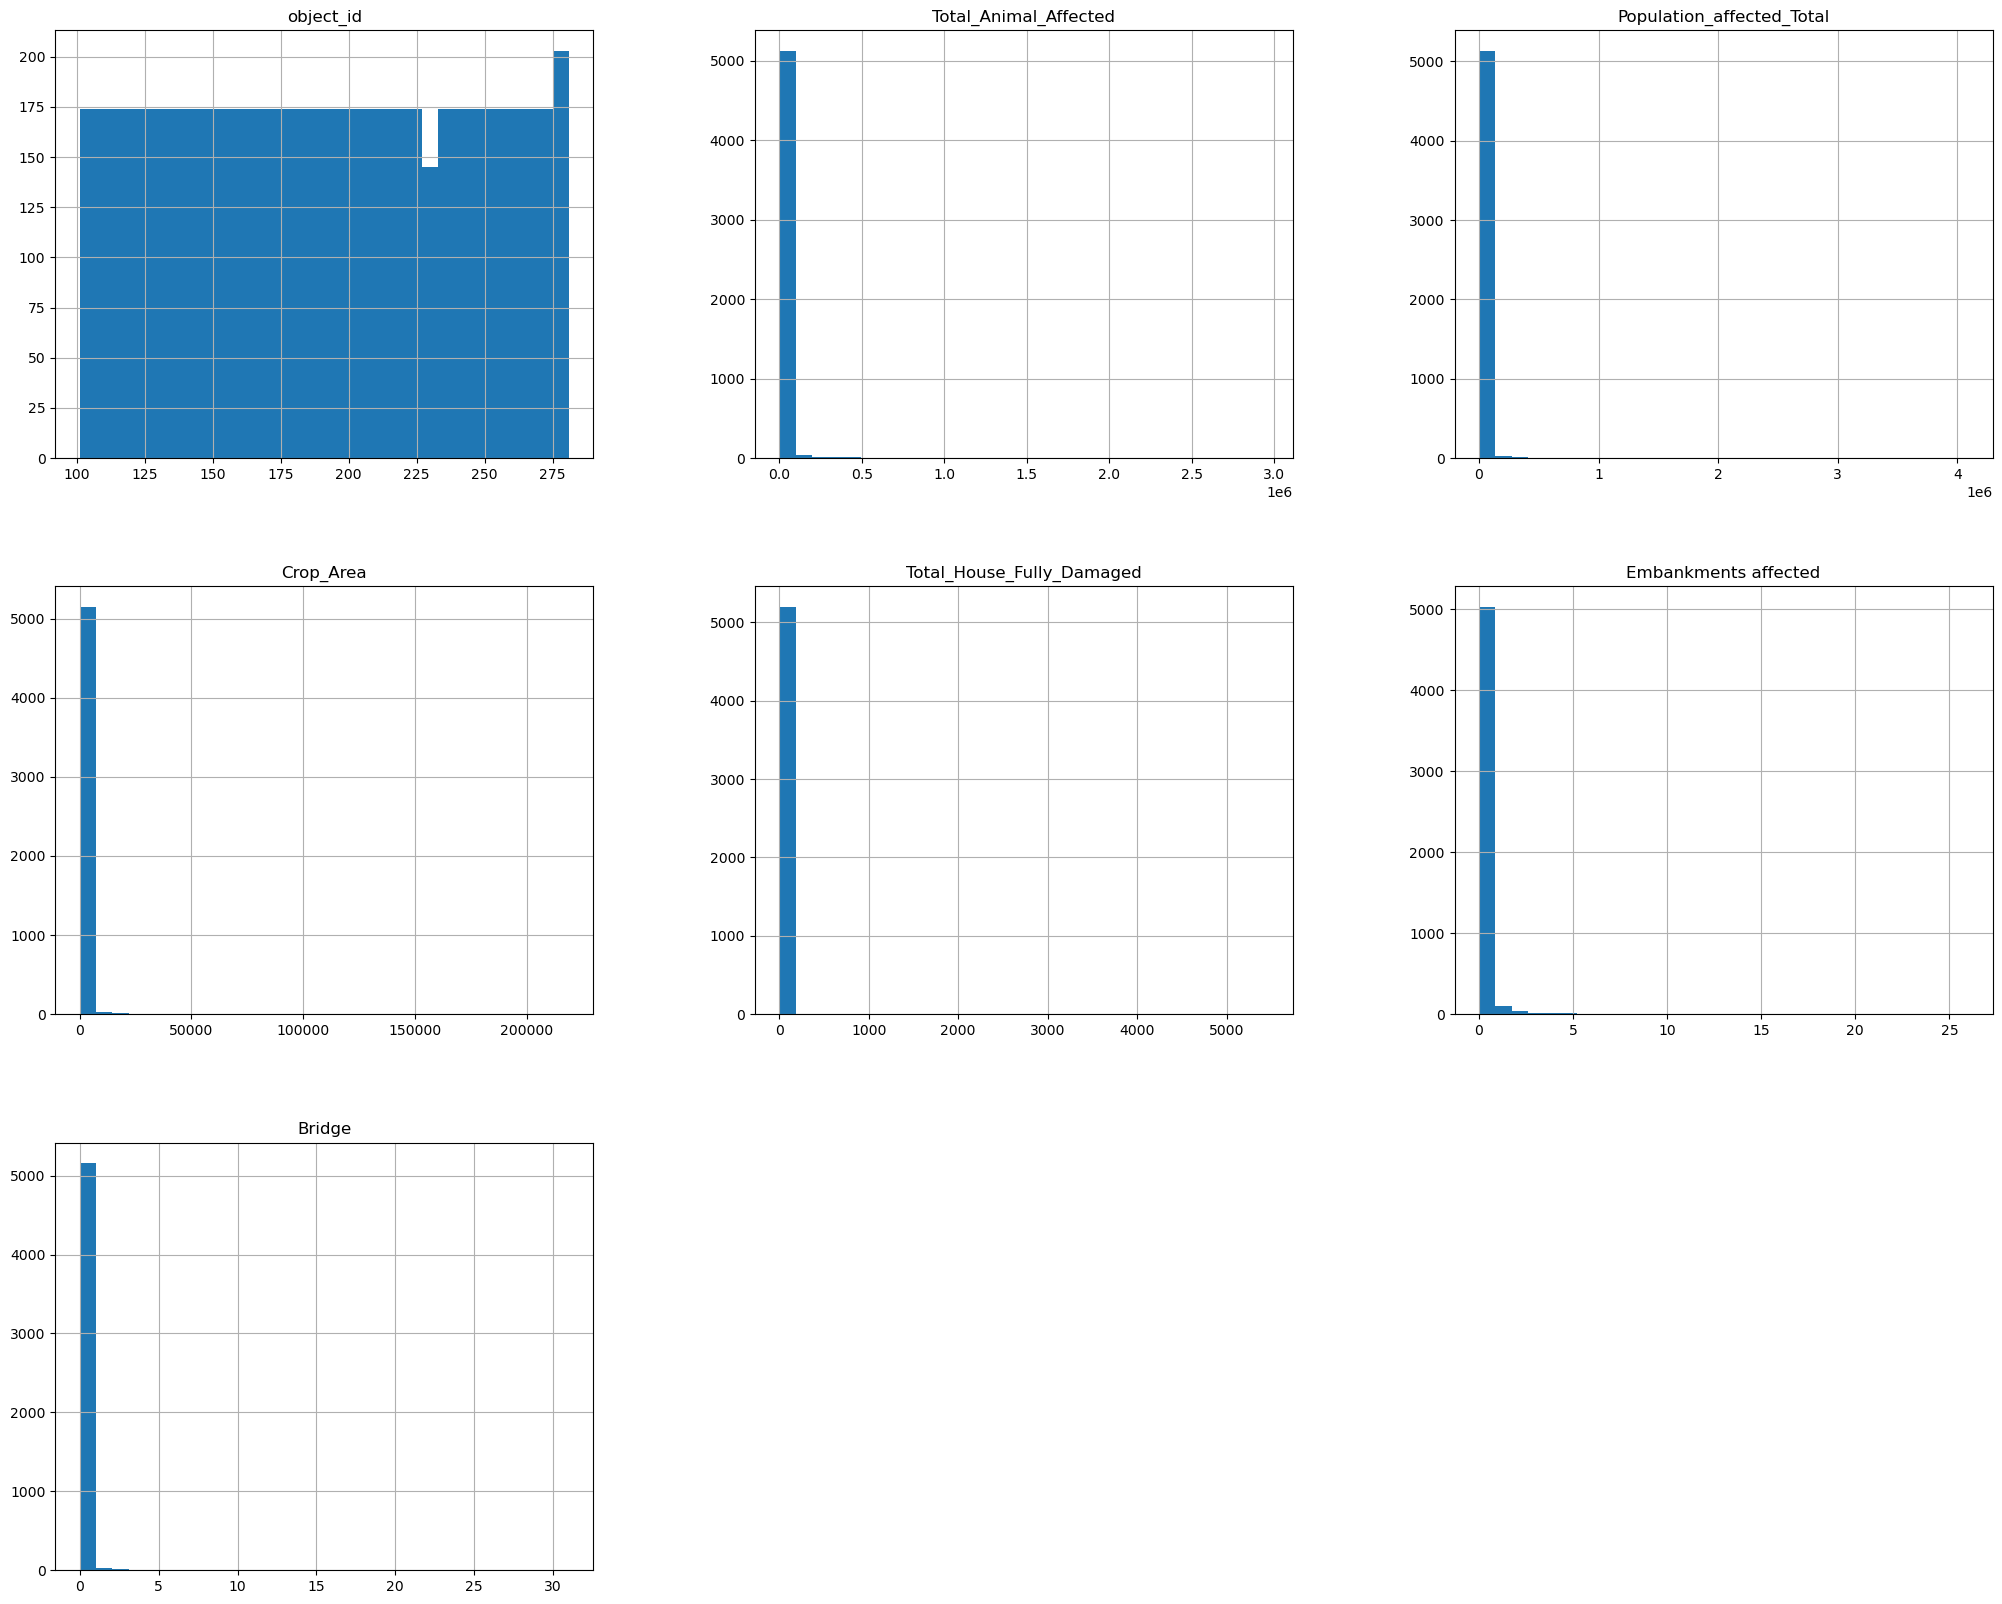

In [10]:
damage_var.hist(bins=30, figsize=(25, 20))

In [11]:
WKA = master_var.loc[master_var['district'] == 'WEST KARBI ANGLONG']
WKA

,object_id,district,rc_area,timeperiod,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,CIDF_tenders_awarded_value,...,revenue_ci_y.1,district_3_y.1,net_sown_area_in_hac,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density
4437,255,WEST KARBI ANGLONG,3073,2021_04,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4438,255,WEST KARBI ANGLONG,3073,2021_05,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4439,255,WEST KARBI ANGLONG,3073,2021_06,2.148294e+07,0.0,21482937.71,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4440,255,WEST KARBI ANGLONG,3073,2021_07,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4441,255,WEST KARBI ANGLONG,3073,2021_08,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4442,255,WEST KARBI ANGLONG,3073,2021_09,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4443,255,WEST KARBI ANGLONG,3073,2021_10,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4444,255,WEST KARBI ANGLONG,3073,2021_11,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4445,255,WEST KARBI ANGLONG,3073,2021_12,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439
4446,255,WEST KARBI ANGLONG,3073,2022_01,0.000000e+00,0.0,0.00,0.0,0.0,0.0,...,Donka,WEST KARBI ANGLONG,48488.349,5.848965,2.0,0.242649,28.835094,52339.0,4989.532823,0.000439


array([[<Axes: title={'center': 'rc_area'}>,
        <Axes: title={'center': 'object_id'}>,
        <Axes: title={'center': 'mean_sexratio'}>,
        <Axes: title={'center': 'sum_aged_population'}>],
       [<Axes: title={'center': 'schools_count'}>,
        <Axes: title={'center': 'health_centres_count'}>,
        <Axes: title={'center': 'rail_length'}>,
        <Axes: title={'center': 'road_length'}>],
       [<Axes: title={'center': 'Embankment breached'}>,
        <Axes: title={'center': 'net_sown_area_in_hac'}>,
        <Axes: title={'center': 'avg_electricity'}>,
        <Axes: title={'center': 'rc_nosanitation_hhds_pct'}>],
       [<Axes: title={'center': 'rc_piped_hhds_pct'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

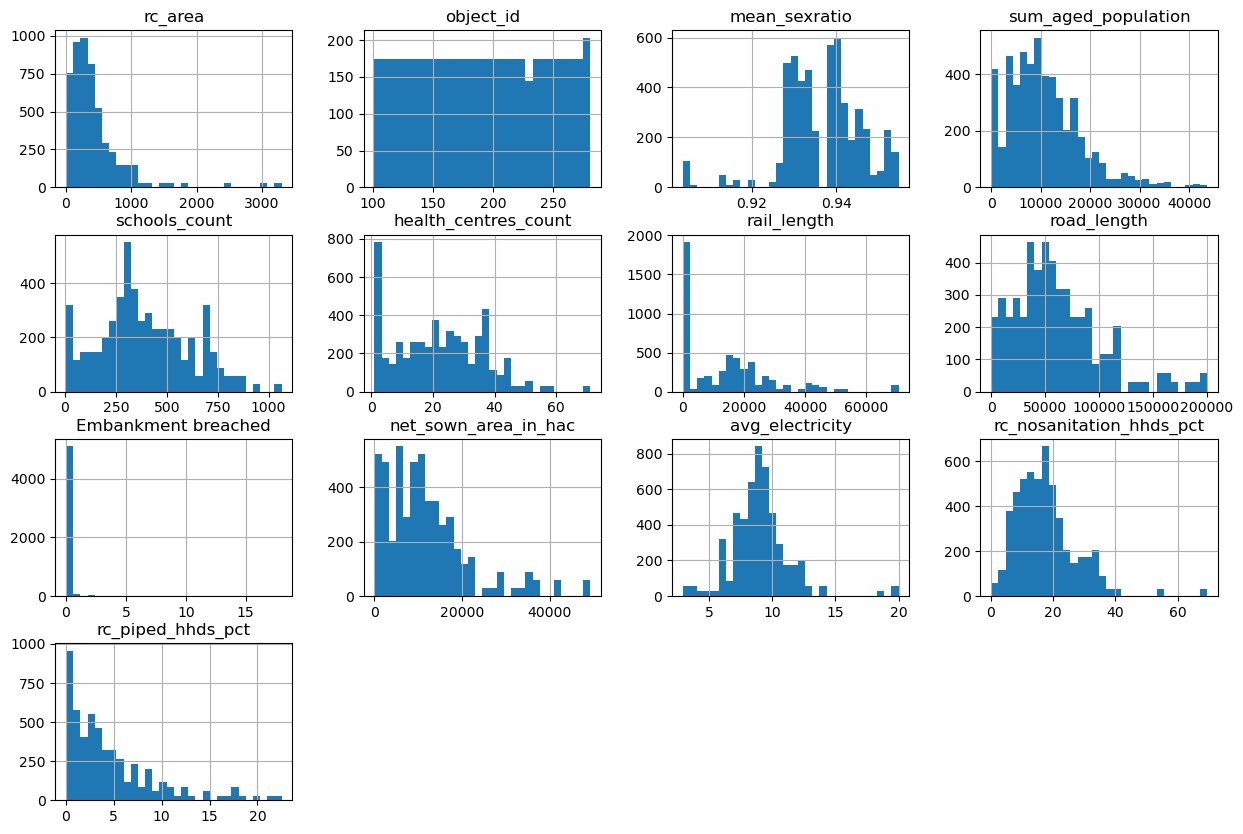

In [12]:
vul_var.hist(bins=30, figsize=(15, 10))

## Statistical Testing

## Testing issue from github - vulnerability scores not matching variables

In [13]:
#Biswanath_Aug23 = Aug23.loc[vul_var['revenue_ci_x'] == 'Biswanath','Helem']
Aug23 = master_var.loc[master_var['timeperiod'] == '2023_08']
Biswanath_Aug23 = Aug23[Aug23['revenue_ci_x'].isin(['Biswanath', 'Helem'])]
#Biswanath_Aug23.T




Investigating the specific case of August 2023 where the issue was noticed:

In [14]:
#Transformation from  vulnerability.py
Biswanath_Aug23['Population_affected_Total'] = Biswanath_Aug23['Population_affected_Total']/Biswanath_Aug23['sum_population']
Biswanath_Aug23['Total_Animal_Affected'] = Biswanath_Aug23['Total_Animal_Affected']/Biswanath_Aug23['sum_population']

Biswanath_Aug23['Total_House_Fully_Damaged'] = Biswanath_Aug23['Total_House_Fully_Damaged']/Biswanath_Aug23['sum_population']
Biswanath_Aug23['Crop_Area'] = Biswanath_Aug23['Crop_Area']/Biswanath_Aug23['net_sown_area_in_hac']
Biswanath_Aug23['Roads'] = Biswanath_Aug23['Roads']/Biswanath_Aug23['rc_area']
Biswanath_Aug23['Bridge'] = Biswanath_Aug23['Bridge']/Biswanath_Aug23['rc_area']
Biswanath_Aug23['Embankment breached'] = Biswanath_Aug23['Embankment breached']/Biswanath_Aug23['rc_area']


Biswanath_Aug23['sum_aged_population'] = Biswanath_Aug23['sum_aged_population']/Biswanath_Aug23['rc_area']
Biswanath_Aug23['rail_length'] = Biswanath_Aug23['rail_length']/Biswanath_Aug23['rc_area']
Biswanath_Aug23['schools_count'] = Biswanath_Aug23['schools_count']/Biswanath_Aug23['rc_area']
Biswanath_Aug23['health_centres_count'] = Biswanath_Aug23['health_centres_count']/Biswanath_Aug23['rc_area']
Biswanath_Aug23['road_length'] = Biswanath_Aug23['road_length']/Biswanath_Aug23['rc_area']
Biswanath_Aug23['net_sown_area_in_hac'] = Biswanath_Aug23['net_sown_area_in_hac']/Biswanath_Aug23['rc_area']
Biswanath_Aug23['Embankments affected'] = Biswanath_Aug23['Embankments affected']/Biswanath_Aug23['rc_area']

C:\Users\saura\AppData\Local\Temp\ipykernel_15936\2164671180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Biswanath_Aug23['Population_affected_Total'] = Biswanath_Aug23['Population_affected_Total']/Biswanath_Aug23['sum_population']
C:\Users\saura\AppData\Local\Temp\ipykernel_15936\2164671180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Biswanath_Aug23['Total_Animal_Affected'] = Biswanath_Aug23['Total_Animal_Affected']/Biswanath_Aug23['sum_population']
C:\Users\saura\AppData\Local\Temp\ipykerne

In [15]:
Biswanath_Aug23.to_csv('Biswanath_Aug23.csv')

<Figure size 1500x1000 with 0 Axes>

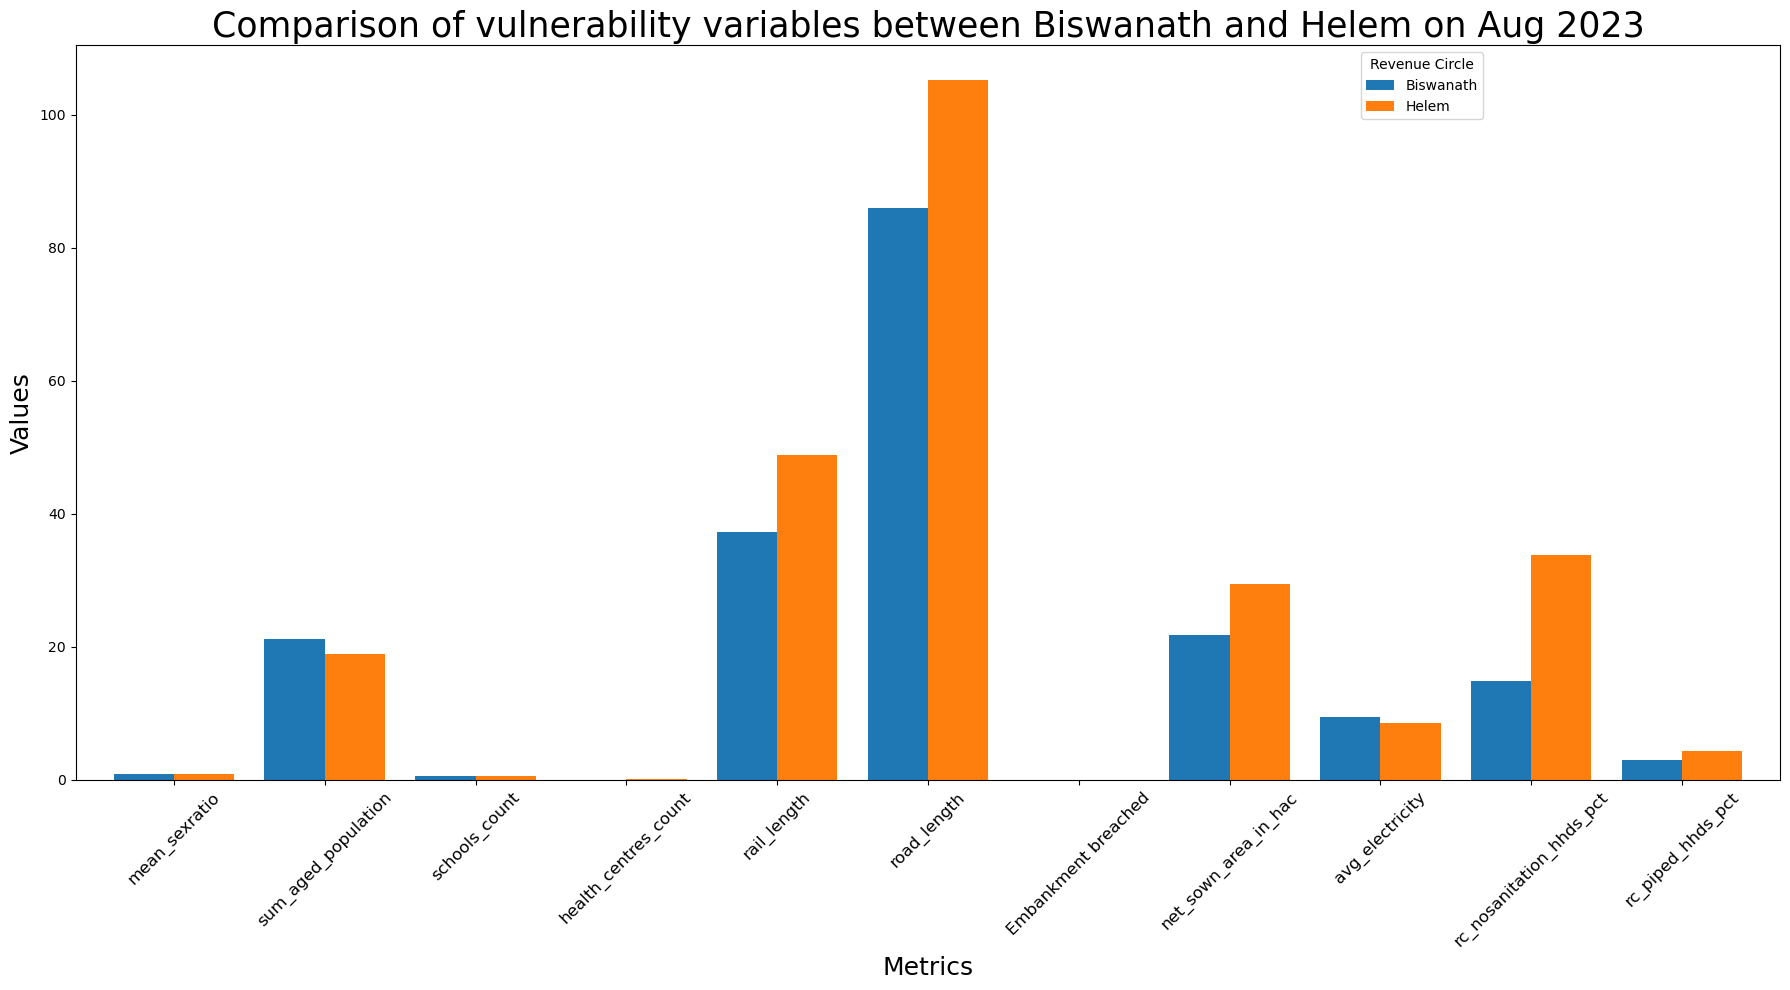

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns of interest
vul_columns = ["mean_sexratio",
                      "sum_aged_population",
                      "schools_count",
                      "health_centres_count",
                      "rail_length",
                      "road_length",
                      "Embankment breached",
                      "net_sown_area_in_hac",
                      "avg_electricity",
                      "rc_nosanitation_hhds_pct",
                      "rc_piped_hhds_pct"]

# Prepare data for plotting
data = Biswanath_Aug23[vul_columns]
data.index = Biswanath_Aug23['revenue_ci_y.1']
data = data.T

# Plot
plt.figure(figsize=(15, 10))
data.plot(kind='bar', figsize=(18, 10), width=0.8)
plt.title('Comparison of vulnerability variables between Biswanath and Helem on Aug 2023', fontsize=25)
plt.xlabel('Metrics', fontsize=18)
plt.ylabel('Values', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Revenue Circle', bbox_to_anchor=(0.75, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Aug23_vulnerability.png')
plt.show()
plt.close()

Visualize damages difference

<Figure size 1500x1000 with 0 Axes>

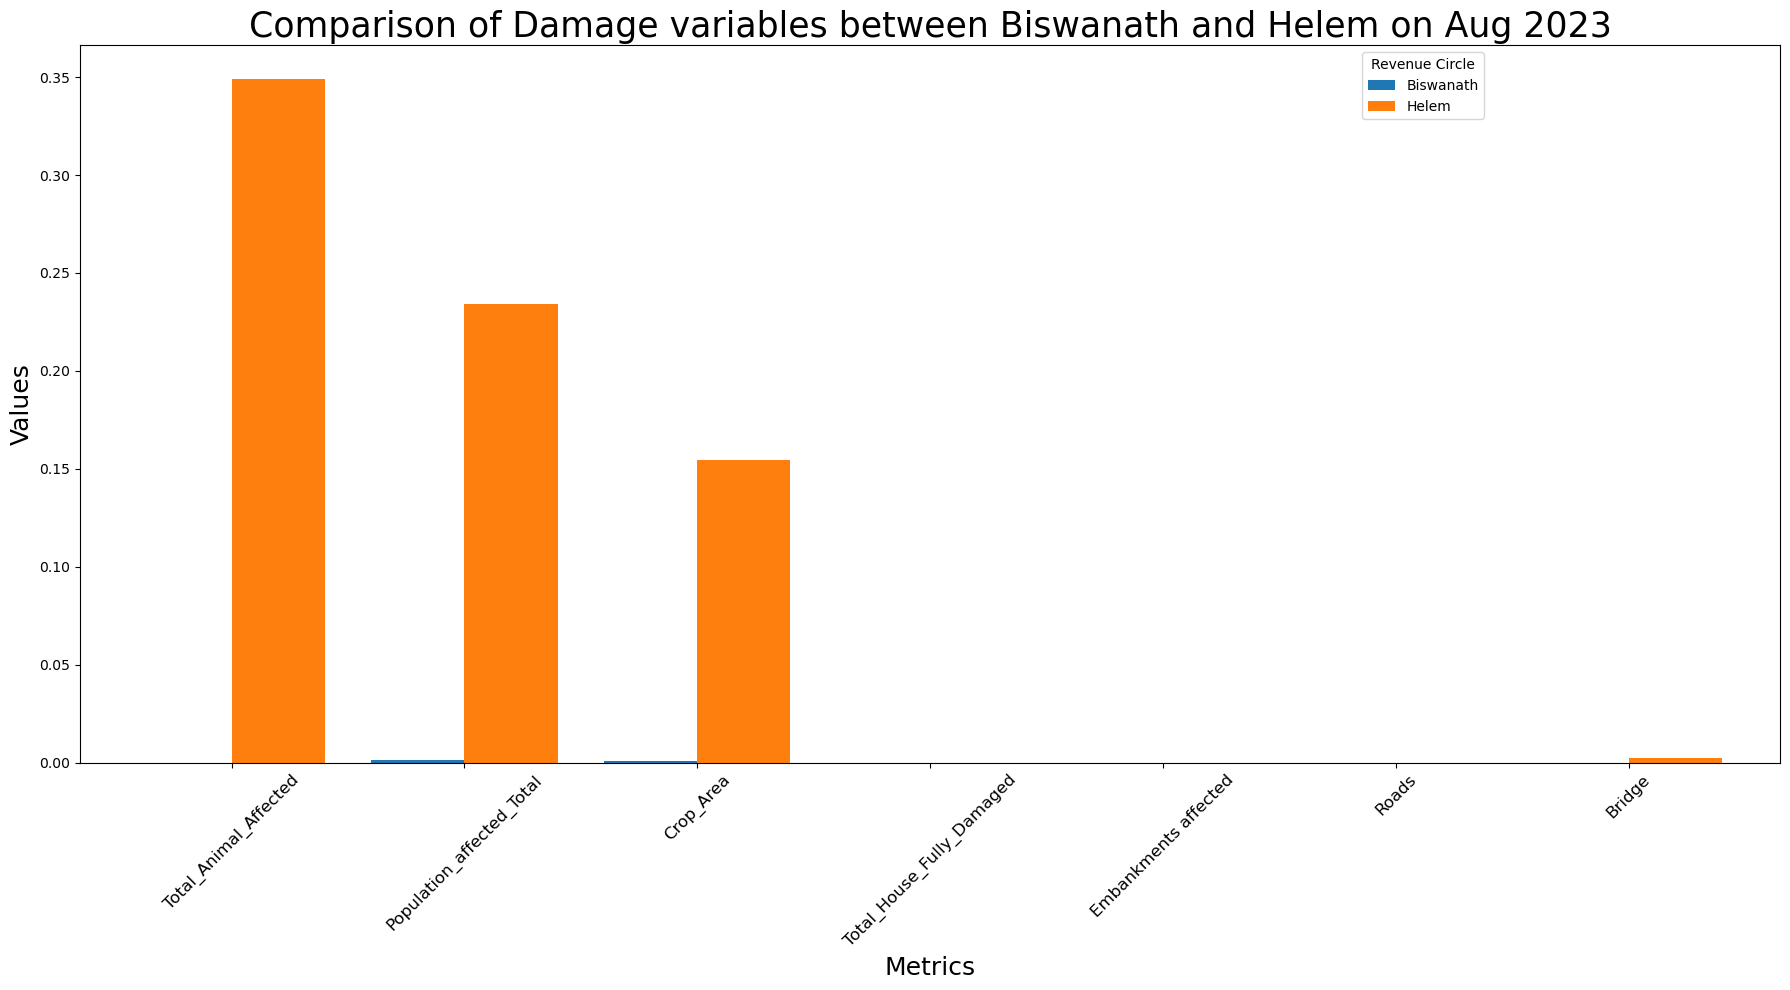

In [17]:
# Select columns of interest
damage_columns = ["Total_Animal_Affected","Population_affected_Total",
                "Crop_Area","Total_House_Fully_Damaged","Embankments affected",
                 "Roads","Bridge"]

# Prepare data for plotting
data = Biswanath_Aug23[damage_columns]
data.index = Biswanath_Aug23['revenue_ci_y.1']
data = data.T

# Plot
plt.figure(figsize=(15, 10))
data.plot(kind='bar', figsize=(18, 10), width=0.8)
plt.title('Comparison of Damage variables between Biswanath and Helem on Aug 2023', fontsize=25)
plt.xlabel('Metrics', fontsize=18)
plt.ylabel('Values', fontsize=18)
plt.xticks(rotation=45,fontsize=12)
plt.legend(title='Revenue Circle', bbox_to_anchor=(0.75, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Aug23_damages.png')
plt.show()
plt.close()


C:\Users\saura\AppData\Local\Temp\ipykernel_15936\855387905.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Biswanath_Aug23[vul_columns + damage_columns] = scaler.fit_transform(Biswanath_Aug23[vul_columns + damage_columns])
C:\Users\saura\AppData\Local\Temp\ipykernel_15936\855387905.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Biswanath_Aug23['schools_count'] = 1 - Biswanath_Aug23['schools_count']
C:\Users\saura\AppData\Local\Temp\ipykernel_15936\855387905.py:9: SettingWithCopyWarning: 
A value i

<Figure size 1500x1000 with 0 Axes>

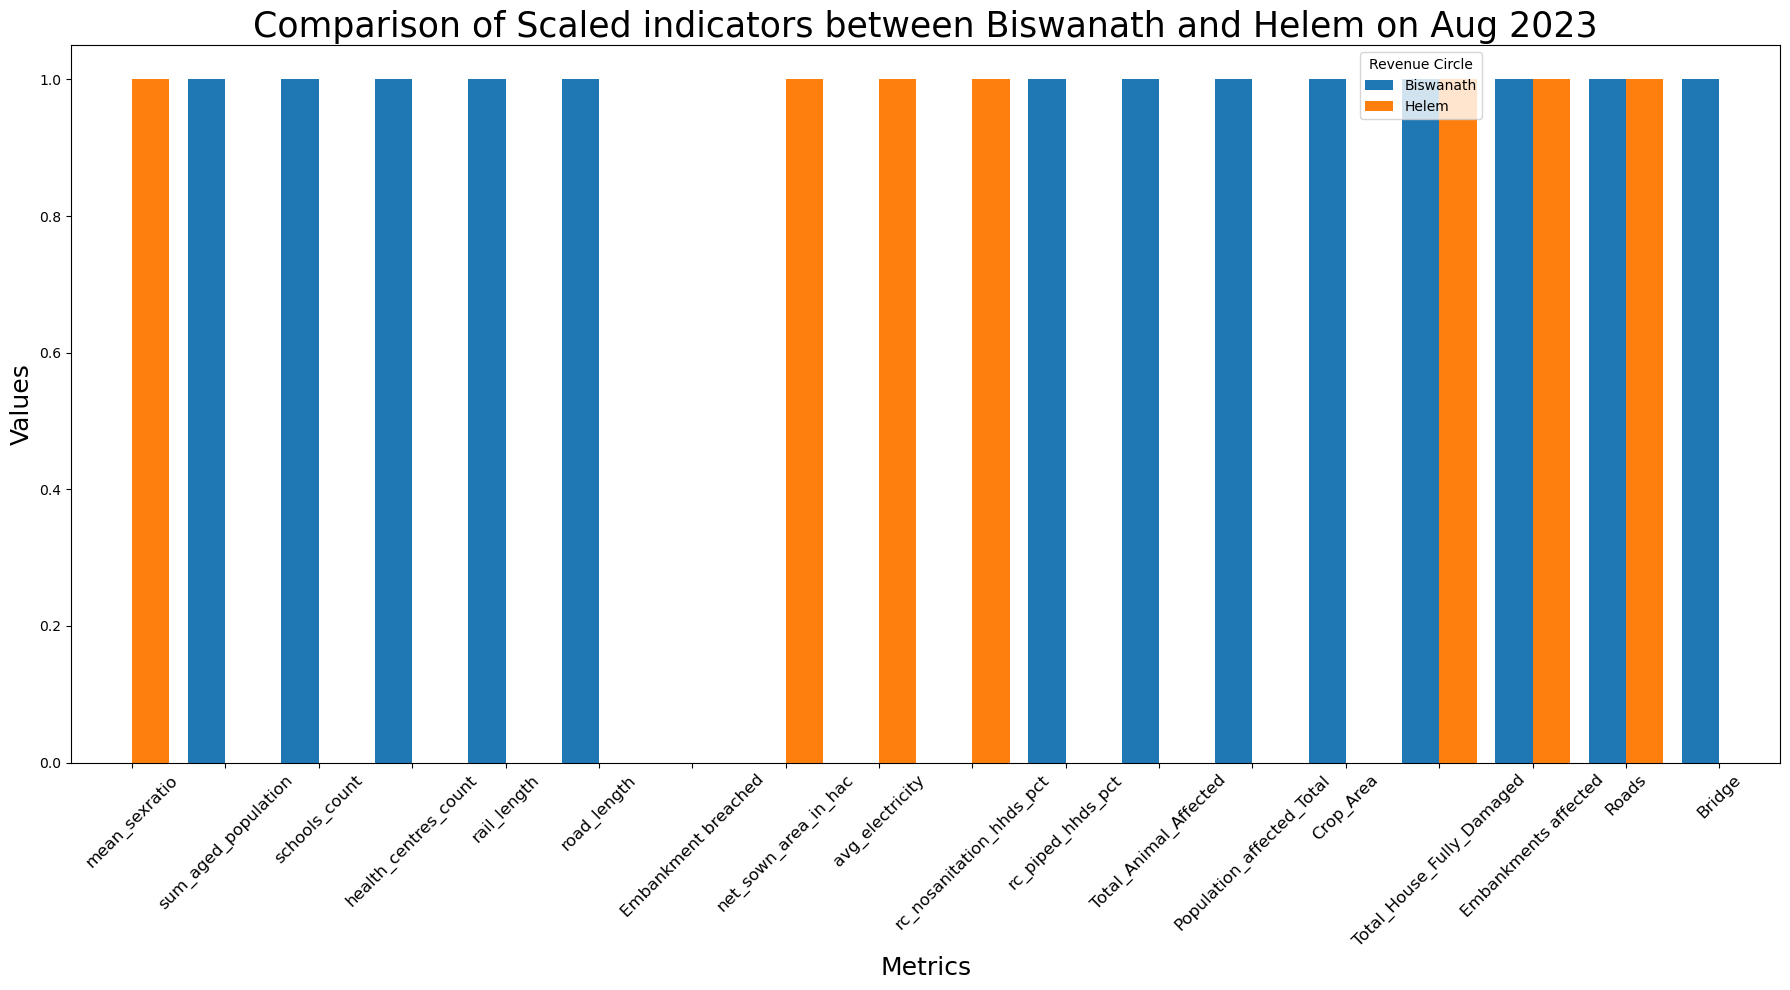

In [18]:
#Visualize the same after the scaling step
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Biswanath_Aug23[vul_columns + damage_columns] = scaler.fit_transform(Biswanath_Aug23[vul_columns + damage_columns])

# Reversing a few input vars (as more input should be more vulnerability)
Biswanath_Aug23['schools_count'] = 1 - Biswanath_Aug23['schools_count']
Biswanath_Aug23['health_centres_count'] = 1 - Biswanath_Aug23['health_centres_count']
Biswanath_Aug23['rail_length'] = 1 - Biswanath_Aug23['rail_length']
Biswanath_Aug23['road_length'] = 1 - Biswanath_Aug23['road_length']
Biswanath_Aug23['avg_electricity'] = 1 - Biswanath_Aug23['avg_electricity']
Biswanath_Aug23['rc_piped_hhds_pct'] = 1 - Biswanath_Aug23['rc_piped_hhds_pct']

# Reversing all output vars (as more output should be less damage)
Biswanath_Aug23[damage_columns] = 1 - Biswanath_Aug23[damage_columns]

# Prepare data for plotting
data = Biswanath_Aug23[vul_columns + damage_columns]
data.index = Biswanath_Aug23['revenue_ci_y.1']
data = data.T

# Plot
plt.figure(figsize=(15, 10))
data.plot(kind='bar', figsize=(18, 10), width=0.8)
plt.title('Comparison of Scaled indicators between Biswanath and Helem on Aug 2023', fontsize=25)
plt.xlabel('Metrics', fontsize=18)
plt.ylabel('Values', fontsize=18)
plt.xticks(rotation=45,fontsize=12)
plt.legend(title='Revenue Circle', bbox_to_anchor=(0.75, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Aug23_damages_scaled.png')
plt.show()
plt.close()


In [19]:
df1 = Aug23.loc[Aug23['revenue_ci_x'] == 'Biswanath'].reset_index()
df2 = Aug23.loc[Aug23['revenue_ci_x'] == 'Helem'].reset_index()
diff = df1.compare(df2)


In [20]:
diff

index       object_id       rc_area       Total_Animal_Affected           \
   self other      self other    self other                  self    other   
0  4291  4320       249   250    1042   427                   0.0  50920.0   

  Population_affected_Total           ... rc_piped_hhds_pct            \
                       self    other  ...              self     other   
0                     424.0  34185.0  ...          2.959702  4.290548   

  rc_nosanitation_hhds_pct            total_hhd          distance_from_river  \
                      self      other      self    other                self   
0                14.835076  33.841453   96004.0  30439.0         1611.353592   

               drainage_density            
         other             self     other  
0  3442.079443         0.000561  0.000627  

[1 rows x 124 columns]

### Repeating the same for all RC's on August 2023

C:\Users\saura\AppData\Local\Temp\ipykernel_15936\3590033241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aug23['Population_affected_Total'] = Aug23['Population_affected_Total']/Aug23['sum_population']
C:\Users\saura\AppData\Local\Temp\ipykernel_15936\3590033241.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Aug23['Total_Animal_Affected'] = Aug23['Total_Animal_Affected']/Aug23['sum_population']
C:\Users\saura\AppData\Local\Temp\ipykernel_15936\3590033241.py:5: SettingWithCopyWarning: 
A value is

<Figure size 1500x1000 with 0 Axes>

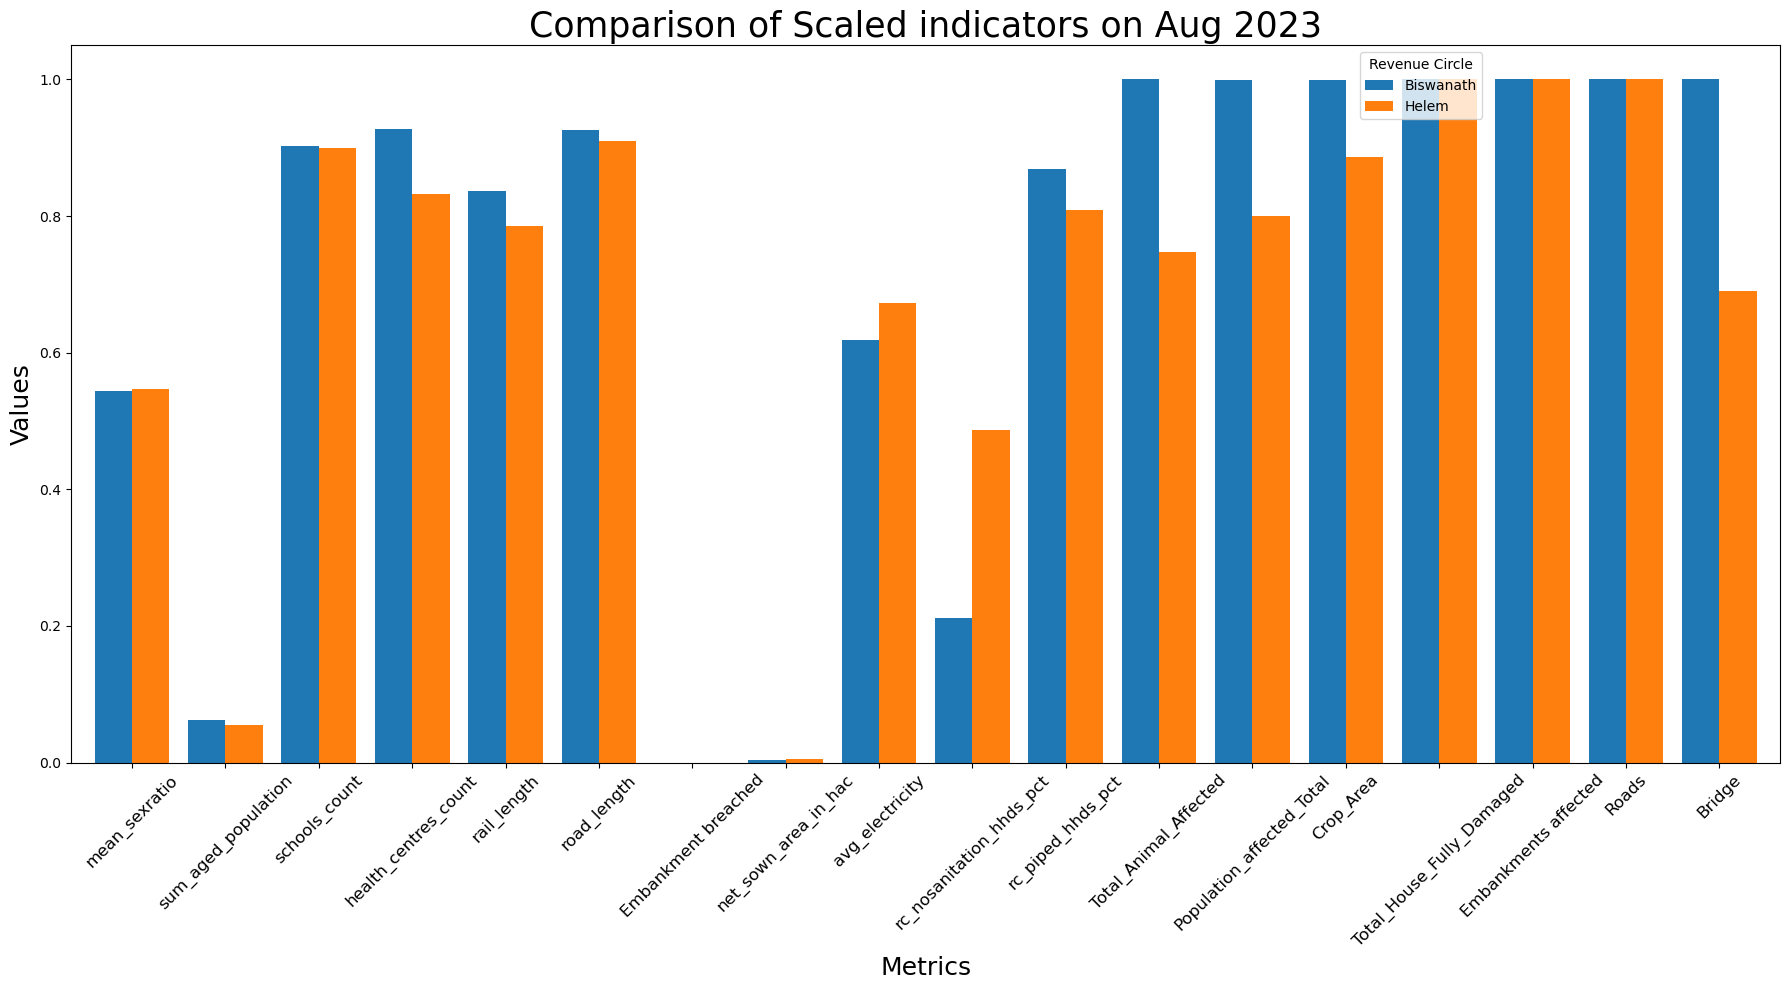

In [21]:
#Transformation from  vulnerability.py
Aug23['Population_affected_Total'] = Aug23['Population_affected_Total']/Aug23['sum_population']
Aug23['Total_Animal_Affected'] = Aug23['Total_Animal_Affected']/Aug23['sum_population']

Aug23['Total_House_Fully_Damaged'] = Aug23['Total_House_Fully_Damaged']/Aug23['sum_population']
Aug23['Crop_Area'] = Aug23['Crop_Area']/Aug23['net_sown_area_in_hac']
Aug23['Roads'] = Aug23['Roads']/Aug23['rc_area']
Aug23['Bridge'] = Aug23['Bridge']/Aug23['rc_area']
Aug23['Embankment breached'] = Aug23['Embankment breached']/Aug23['rc_area']


Aug23['sum_aged_population'] = Aug23['sum_aged_population']/Aug23['rc_area']
Aug23['rail_length'] = Aug23['rail_length']/Aug23['rc_area']
Aug23['schools_count'] = Aug23['schools_count']/Aug23['rc_area']
Aug23['health_centres_count'] = Aug23['health_centres_count']/Aug23['rc_area']
Aug23['road_length'] = Aug23['road_length']/Aug23['rc_area']
Aug23['net_sown_area_in_hac'] = Aug23['net_sown_area_in_hac']/Aug23['rc_area']
Aug23['Embankments affected'] = Aug23['Embankments affected']/Aug23['rc_area']


# Select columns of interest
vul_columns = ["mean_sexratio",
                      "sum_aged_population",
                      "schools_count",
                      "health_centres_count",
                      "rail_length",
                      "road_length",
                      "Embankment breached",
                      "net_sown_area_in_hac",
                      "avg_electricity",
                      "rc_nosanitation_hhds_pct",
                      "rc_piped_hhds_pct"]

damage_columns = ["Total_Animal_Affected","Population_affected_Total",
                "Crop_Area","Total_House_Fully_Damaged","Embankments affected",
                 "Roads","Bridge"]


Aug23[vul_columns + damage_columns] = scaler.fit_transform(Aug23[vul_columns + damage_columns])

# Reversing a few input vars (as more input should be more vulnerability)
Aug23['schools_count'] = 1 - Aug23['schools_count']
Aug23['health_centres_count'] = 1 - Aug23['health_centres_count']
Aug23['rail_length'] = 1 - Aug23['rail_length']
Aug23['road_length'] = 1 - Aug23['road_length']
Aug23['avg_electricity'] = 1 - Aug23['avg_electricity']
Aug23['rc_piped_hhds_pct'] = 1 - Aug23['rc_piped_hhds_pct']


# Reversing all output vars (as more output should be less damage)
Aug23[damage_columns] = 1 - Aug23[damage_columns]

Biswanath_Aug23 = Aug23[Aug23['revenue_ci_x'].isin(['Biswanath', 'Helem'])]

# Prepare data for plotting
data = Biswanath_Aug23[vul_columns + damage_columns]
data.index = Biswanath_Aug23['revenue_ci_y.1']
data = data.T

# Plot
plt.figure(figsize=(15, 10))
data.plot(kind='bar', figsize=(18, 10), width=0.8)
plt.title('Comparison of Scaled indicators on Aug 2023', fontsize=25)
plt.xlabel('Metrics', fontsize=18)
plt.ylabel('Values', fontsize=18)
plt.xticks(rotation=45,fontsize=12)
plt.legend(title='Revenue Circle', bbox_to_anchor=(0.75, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Biswanath_Aug23_damages_scaled.png')
plt.show()
plt.close()

In [22]:
Aug23.describe()

,object_id,rc_area,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,CIDF_tenders_awarded_value,Preparedness Measures_tenders_awarded_value,Immediate Measures_tenders_awarded_value,...,elevation_mean,slope_mean,net_sown_area_in_hac,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density
count,180.000000,180.000000,1.800000e+02,1.800000e+02,1.800000e+02,1.800000e+02,180.0,180.0,1.800000e+02,1.800000e+02,...,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,190.788889,436.166667,6.874988e+06,9.459714e+05,1.831483e+04,4.842277e+06,0.0,0.0,6.716276e+06,1.831483e+04,...,98.601783,3.873608,0.018096,6.419039e-01,2.222222,0.795410,0.251617,43743.322222,3314.734041,0.000582
std,52.463234,452.798554,2.155867e+07,9.121881e+06,2.457193e+05,1.839870e+07,0.0,0.0,2.089653e+07,2.457193e+05,...,104.489402,3.241747,0.093284,1.365402e-01,0.416899,0.207524,0.140064,34557.543094,3029.640274,0.000094
min,101.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,19.313229,1.798544,0.000000,1.110223e-16,2.000000,0.000000,0.000000,0.000000,379.126625,0.000247
25%,145.750000,177.750000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,50.694877,2.318107,0.002887,5.812931e-01,2.000000,0.712085,0.148701,21471.000000,1328.473449,0.000535
50%,190.500000,323.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,72.594048,2.584314,0.005323,6.518816e-01,2.000000,0.860737,0.233981,38523.500000,2327.260688,0.000602
75%,236.250000,516.250000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,...,103.302705,3.607187,0.008376,7.123815e-01,2.000000,0.949525,0.315972,56792.250000,4050.430116,0.000652
max,281.000000,3303.000000,1.430816e+08,1.188416e+08,3.296670e+06,1.363320e+08,0.0,0.0,1.363320e+08,3.296670e+06,...,814.182769,22.499934,1.000000,1.000000e+00,3.000000,1.000000,1.000000,252636.000000,18894.999447,0.000730


In [23]:
Biswanath_Aug23 = Aug23[Aug23['revenue_ci_x'].isin(['Biswanath', 'Helem'])]

# Prepare data for plotting
data = Biswanath_Aug23[damage_columns]
data

,Total_Animal_Affected,Population_affected_Total,Crop_Area,Total_House_Fully_Damaged,Embankments affected,Roads,Bridge
4291,1.000000,0.999094,0.999548,1.0,1.0,1.0,1.000000
4320,0.747409,0.800513,0.886440,1.0,1.0,1.0,0.690867


## Plotting Damage variables between the two RC's

## Creating Spider plots of vulnerability variables
Following this tutorial: https://www.pythoncharts.com/matplotlib/radar-charts/

(<a list of 14 Line2D ticklines objects>,
 [Text(0.0, 0, 'Bridge'),
  Text(1.0471975511965976, 0, 'Population_affected_Total'),
  Text(2.0943951023931953, 0, 'Crop_Area'),
  Text(3.141592653589793, 0, 'Total_House_Fully_Damaged'),
  Text(4.1887902047863905, 0, 'Embankments affected'),
  Text(5.235987755982988, 0, 'Roads'),
  Text(0.0, 0, 'Bridge')])

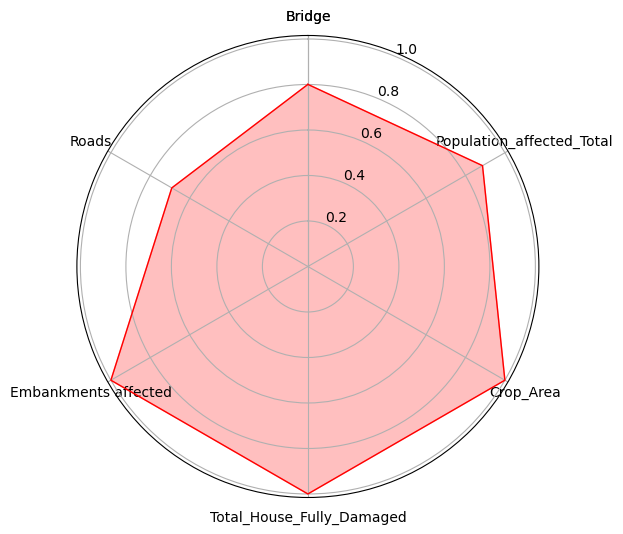

In [24]:
# Each attribute we'll plot in the radar chart.
labels = damage_columns

Biswanath_Aug23 = Aug23[Aug23['revenue_ci_x'].isin(['Biswanath', 'Helem'])]
# Let's look at the 1970 Chevy Impala and plot it.
Biswanath_Aug23.set_index('revenue_ci_y.1', inplace=True)
data = Biswanath_Aug23[damage_columns]

values = data.loc['Helem'].values.tolist()[1:]

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars-1, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

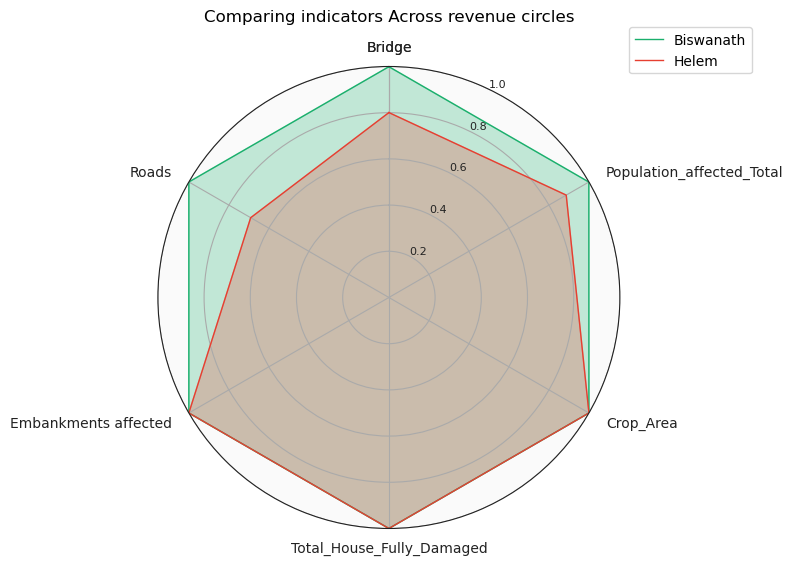

In [25]:
# Each attribute we'll plot in the radar chart.
labels = damage_columns

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars-1, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(RC, color):
  values = data.loc[RC].values.tolist()[1:]
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=RC)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Biswanath', '#1aaf6c')
add_to_radar('Helem', '#E63F31')
#add_to_radar('ford granada 1977', '#d42cea')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing indicators Across revenue circles', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

Plotting the vulnerability variables

In [26]:
angles

[0.0,
 1.0471975511965976,
 2.0943951023931953,
 3.141592653589793,
 4.1887902047863905,
 5.235987755982988,
 0.0]

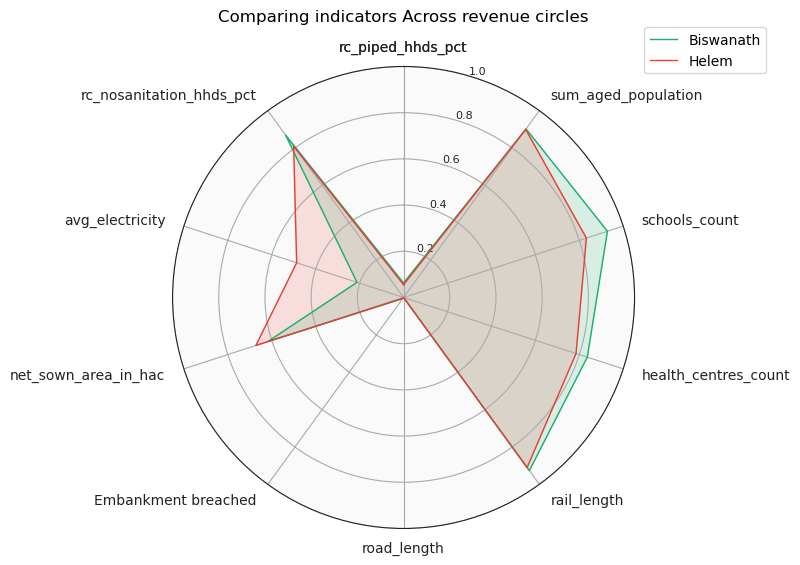

In [27]:
data = Biswanath_Aug23[vul_columns]
# Each attribute we'll plot in the radar chart.
labels2 = vul_columns

# Number of variables we're plotting.
num_vars2 = len(labels2)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars2-1, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(RC, color):
  values = data.loc[RC].values.tolist()[1:]
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=RC)
  ax.fill(angles, values, color=color, alpha=0.15)

# Add each car to the chart.
add_to_radar('Biswanath', '#1aaf6c')
add_to_radar('Helem', '#E63F31')
#add_to_radar('ford granada 1977', '#d42cea')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels2)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars2)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing indicators Across revenue circles', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

## Revenue Circle Comparisons

## Statistical Testing

In [28]:
from scipy import stats
import pyhomogeneity as ph
from scipy.stats import chi2_contingency

In [29]:

def homogeneity_test(df):

    results = []

    for col in df.columns:
        freq_counts = df[col].value_counts().values

        # Create a contingency table
        contingency_table = [freq_counts, freq_counts]  # Dummy example, adjust as per your test requirements

        # Run the Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Store the results
        results.append({
            'Column': col,
            'Chi2': chi2,
            'p-value': p,
            'Degrees of Freedom': dof
        })

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return results_df

homogeneity_test(Aug23)

,Column,Chi2,p-value,Degrees of Freedom
0,object_id,0.0,1.0,179
1,district,0.0,1.0,34
2,rc_area,0.0,1.0,168
3,timeperiod,0.0,1.0,0
4,total_tender_awarded_value,0.0,1.0,30
...,...,...,...,...
88,rc_piped_hhds_pct,0.0,1.0,170
89,rc_nosanitation_hhds_pct,0.0,1.0,178
90,total_hhd,0.0,1.0,176
91,distance_from_river,0.0,1.0,179


<Axes: >

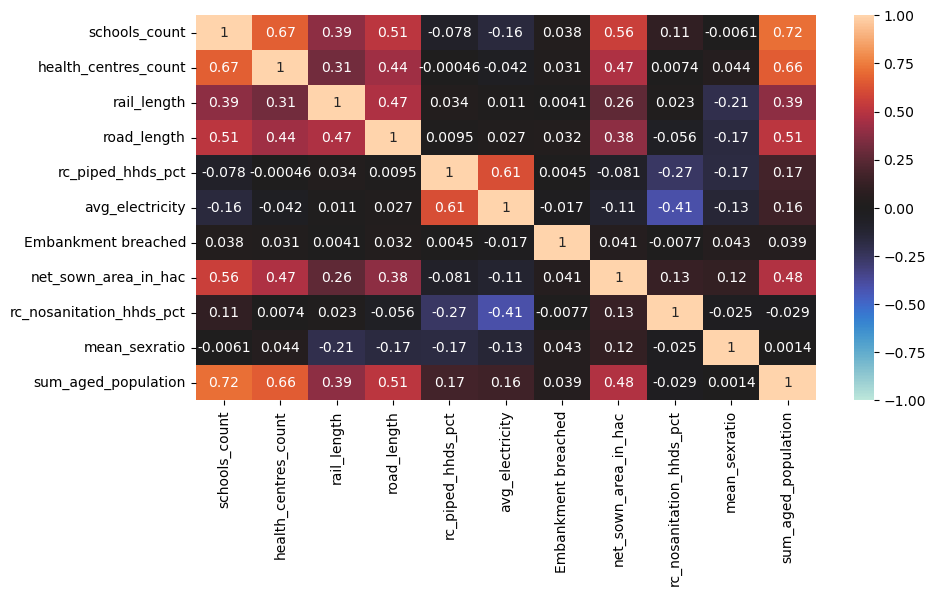

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(vul_score[["schools_count","health_centres_count","rail_length","road_length","rc_piped_hhds_pct","avg_electricity","Embankment breached","net_sown_area_in_hac","rc_nosanitation_hhds_pct","mean_sexratio","sum_aged_population"]].corrwith(vul_scores['efficiency']),vmin=-1,annot= True,cmap="icefire")

<Axes: >

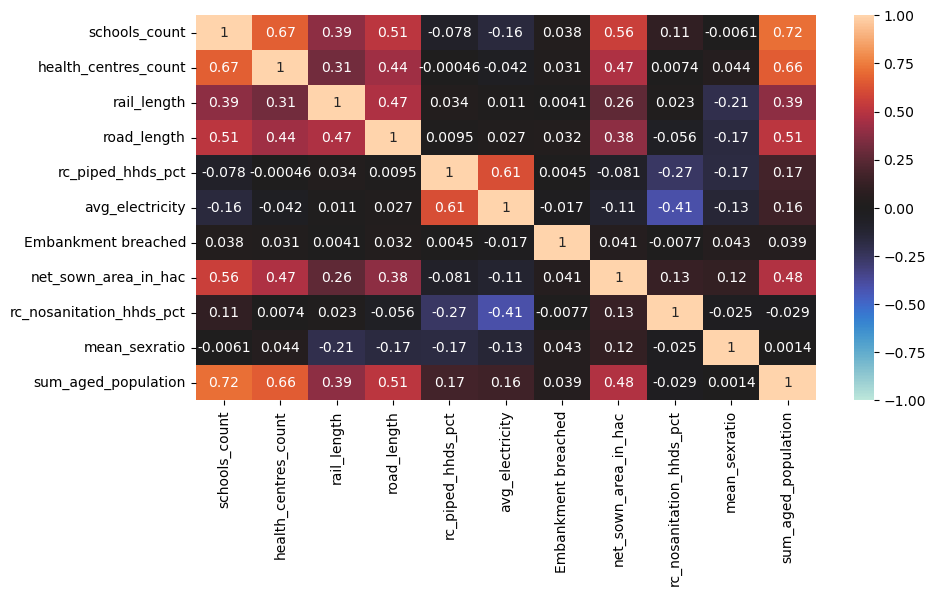

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(vul_var[["schools_count","health_centres_count","rail_length","road_length","rc_piped_hhds_pct","avg_electricity","Embankment breached","net_sown_area_in_hac","rc_nosanitation_hhds_pct","mean_sexratio","sum_aged_population"]].corr(),vmin=-1,annot= True,cmap="icefire")

#### Correlation of inputs + outputs with efficiency score

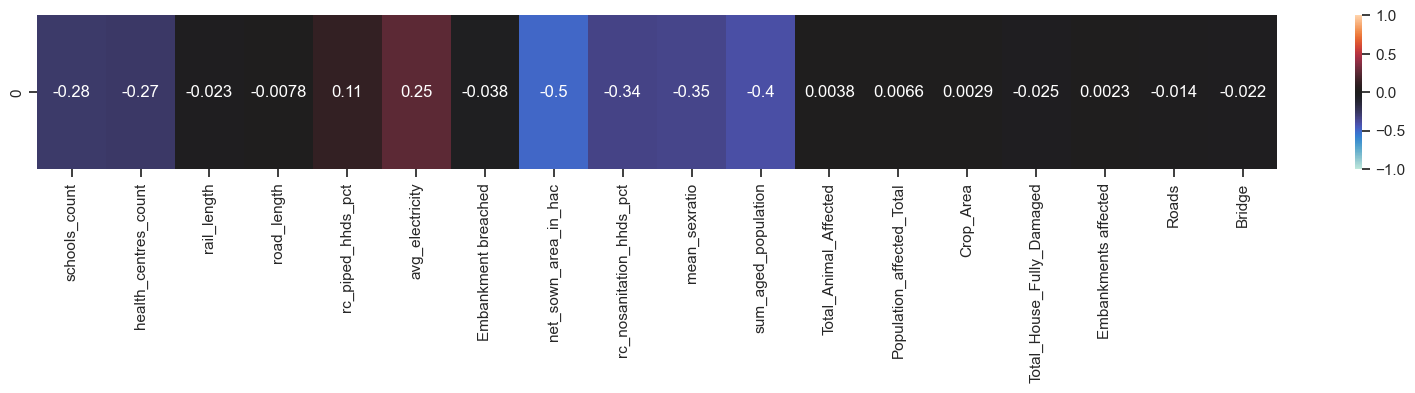

In [74]:
correlations = vul_scores[["schools_count","health_centres_count","rail_length","road_length","rc_piped_hhds_pct","avg_electricity","Embankment breached","net_sown_area_in_hac","rc_nosanitation_hhds_pct","mean_sexratio","sum_aged_population",'Total_Animal_Affected', 'Population_affected_Total', 'Crop_Area', 'Total_House_Fully_Damaged', 'Embankments affected', 'Roads', 'Bridge']].corrwith(vul_scores['efficiency'],method='spearman')
# Convert to DataFrame
correlations_df = correlations.to_frame().T

# Plot heatmap
plt.figure(figsize=(20, 2))
sns.heatmap(correlations_df, vmin=-1, vmax=1, annot=True, cmap="icefire")
plt.show()

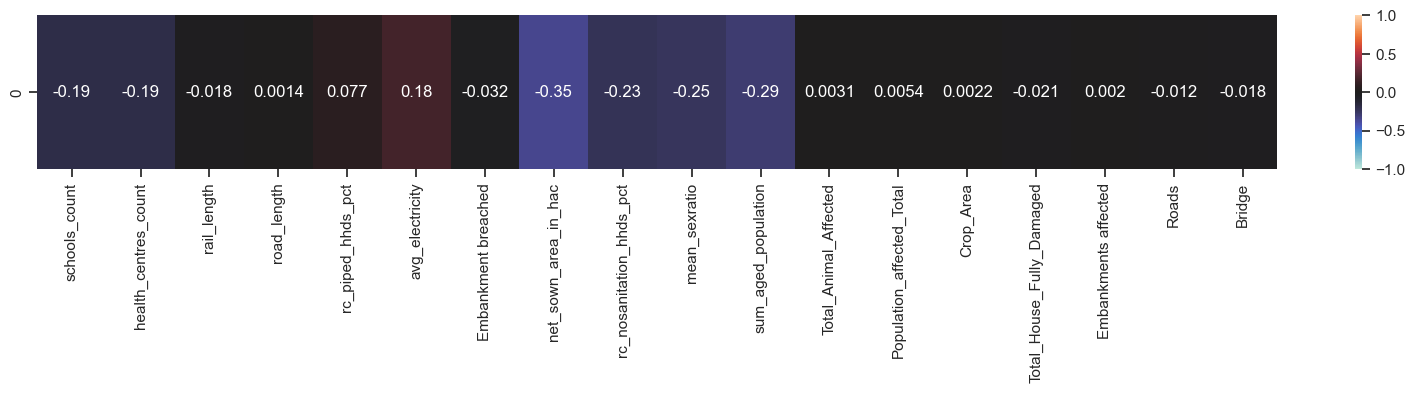

In [73]:
correlations = vul_scores[["schools_count","health_centres_count","rail_length","road_length","rc_piped_hhds_pct","avg_electricity","Embankment breached","net_sown_area_in_hac","rc_nosanitation_hhds_pct","mean_sexratio","sum_aged_population",'Total_Animal_Affected', 'Population_affected_Total', 'Crop_Area', 'Total_House_Fully_Damaged', 'Embankments affected', 'Roads', 'Bridge']].corrwith(vul_scores['efficiency'],method='kendall')
# Convert to DataFrame
correlations_df = correlations.to_frame().T

# Plot heatmap
plt.figure(figsize=(20, 2))
sns.heatmap(correlations_df, vmin=-1, vmax=1, annot=True, cmap="icefire")
plt.show()

Question to confirm - what is the cutoff for correlation? Should one of the correlated columns be dropped?

In [32]:
vul_var['z_scores'] = stats.zscore(vul_var['Embankment breached'])
outliers = vul_var[vul_var['z_scores'] > 2]


C:\Users\saura\AppData\Local\Temp\ipykernel_15936\1726076149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vul_var['z_scores'] = stats.zscore(vul_var['Embankment breached'])


In [33]:
outliers

,rc_area,object_id,revenue_ci_x,timeperiod,mean_sexratio,sum_aged_population,schools_count,health_centres_count,rail_length,road_length,Embankment breached,net_sown_area_in_hac,avg_electricity,rc_nosanitation_hhds_pct,rc_piped_hhds_pct,z_scores
478,478,117,Matia,2022_06,0.944340,15045.850195,550,36,17593.375126,115903.973896,2.0,34621.50000,8.281091,13.324844,2.407965,2.756437
623,316,122,Barpeta,2022_06,0.935413,21944.850391,757,55,0.000000,78362.347964,2.0,33244.32000,10.176465,12.897642,2.725048,2.756437
651,262,123,Sarthebari,2022_05,0.935372,12214.141797,434,40,0.000000,55324.261444,7.0,9976.14000,8.263522,11.658947,2.592261,9.908539
681,167,124,Bajali (Pt),2022_06,0.935440,6745.466699,250,27,12049.815697,87183.786126,3.0,11266.12000,7.629214,7.544815,2.926963,4.186857
693,167,124,Bajali (Pt),2023_06,0.935802,6992.105371,250,27,12049.815697,87183.786126,6.0,11266.12000,7.629214,7.544815,2.926963,8.478119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,192,268,Kalaigaon (Pt),2023_08,0.951555,3895.632202,224,3,15065.508586,75650.522726,2.0,14891.86400,8.320356,8.578621,2.077530,2.756437
4856,440,269,Mangaldoi (Pt),2022_05,0.932953,12830.720508,410,28,0.000000,81613.112597,3.0,16953.77123,10.120921,15.590696,10.252799,4.186857
4857,440,269,Mangaldoi (Pt),2022_06,0.932953,12830.720508,410,28,0.000000,81613.112597,8.0,16953.77123,10.120921,15.590696,10.252799,11.338960
4869,440,269,Mangaldoi (Pt),2023_06,0.933111,13360.735156,410,28,0.000000,81613.112597,15.0,16953.77123,10.120921,15.590696,10.252799,21.351904


In [34]:
damage_var['z_scores'] = stats.zscore(damage_var['Population_affected_Total'])
outliers = vul_var[vul_var['z_scores'] > 2]
outliers

C:\Users\saura\AppData\Local\Temp\ipykernel_15936\1482337200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_var['z_scores'] = stats.zscore(damage_var['Population_affected_Total'])


,rc_area,object_id,revenue_ci_x,timeperiod,mean_sexratio,sum_aged_population,schools_count,health_centres_count,rail_length,road_length,Embankment breached,net_sown_area_in_hac,avg_electricity,rc_nosanitation_hhds_pct,rc_piped_hhds_pct,z_scores
478,478,117,Matia,2022_06,0.944340,15045.850195,550,36,17593.375126,115903.973896,2.0,34621.50000,8.281091,13.324844,2.407965,2.756437
623,316,122,Barpeta,2022_06,0.935413,21944.850391,757,55,0.000000,78362.347964,2.0,33244.32000,10.176465,12.897642,2.725048,2.756437
651,262,123,Sarthebari,2022_05,0.935372,12214.141797,434,40,0.000000,55324.261444,7.0,9976.14000,8.263522,11.658947,2.592261,9.908539
681,167,124,Bajali (Pt),2022_06,0.935440,6745.466699,250,27,12049.815697,87183.786126,3.0,11266.12000,7.629214,7.544815,2.926963,4.186857
693,167,124,Bajali (Pt),2023_06,0.935802,6992.105371,250,27,12049.815697,87183.786126,6.0,11266.12000,7.629214,7.544815,2.926963,8.478119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4842,192,268,Kalaigaon (Pt),2023_08,0.951555,3895.632202,224,3,15065.508586,75650.522726,2.0,14891.86400,8.320356,8.578621,2.077530,2.756437
4856,440,269,Mangaldoi (Pt),2022_05,0.932953,12830.720508,410,28,0.000000,81613.112597,3.0,16953.77123,10.120921,15.590696,10.252799,4.186857
4857,440,269,Mangaldoi (Pt),2022_06,0.932953,12830.720508,410,28,0.000000,81613.112597,8.0,16953.77123,10.120921,15.590696,10.252799,11.338960
4869,440,269,Mangaldoi (Pt),2023_06,0.933111,13360.735156,410,28,0.000000,81613.112597,15.0,16953.77123,10.120921,15.590696,10.252799,21.351904


array([[<Axes: title={'center': 'object_id'}>,
        <Axes: title={'center': 'Total_Animal_Affected'}>,
        <Axes: title={'center': 'Population_affected_Total'}>],
       [<Axes: title={'center': 'Crop_Area'}>,
        <Axes: title={'center': 'Total_House_Fully_Damaged'}>,
        <Axes: title={'center': 'Embankments affected'}>],
       [<Axes: title={'center': 'Bridge'}>,
        <Axes: title={'center': 'z_scores'}>, <Axes: >]], dtype=object)

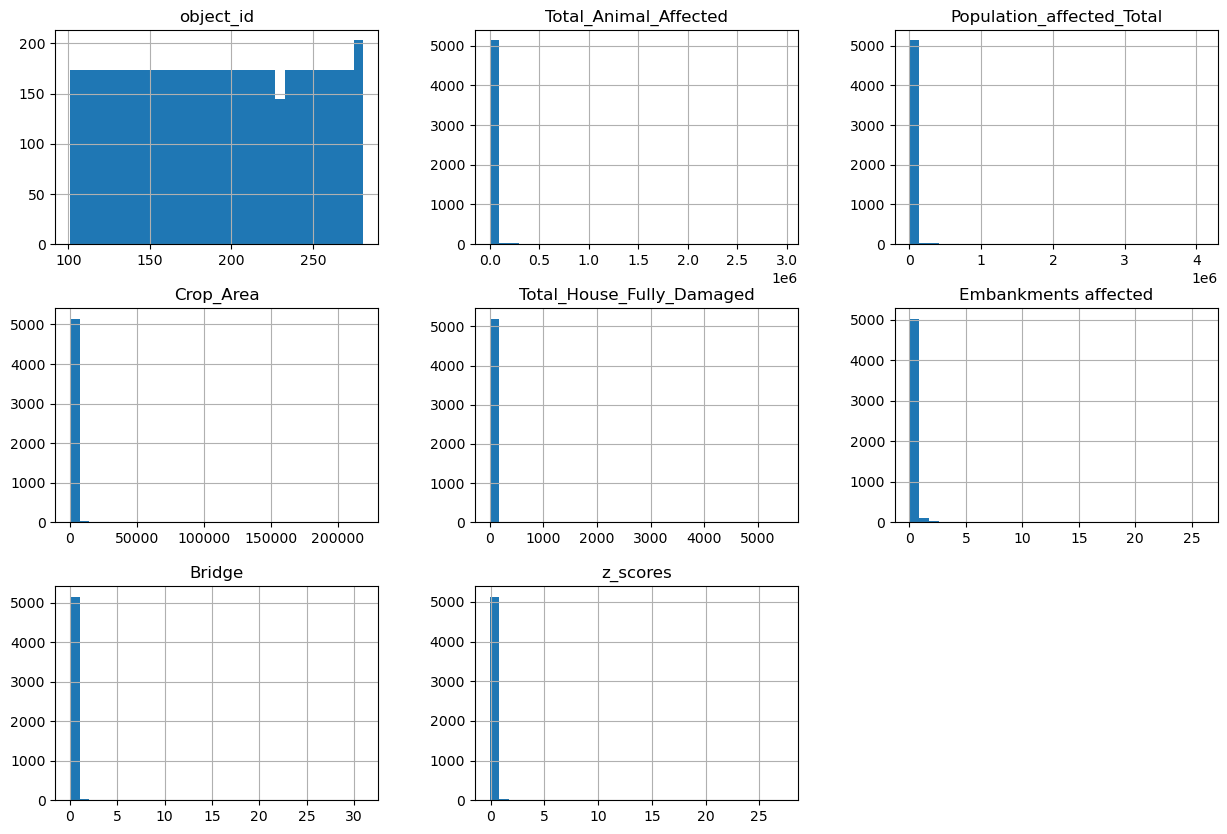

In [35]:
damage_var.hist(bins=30, figsize=(15, 10))

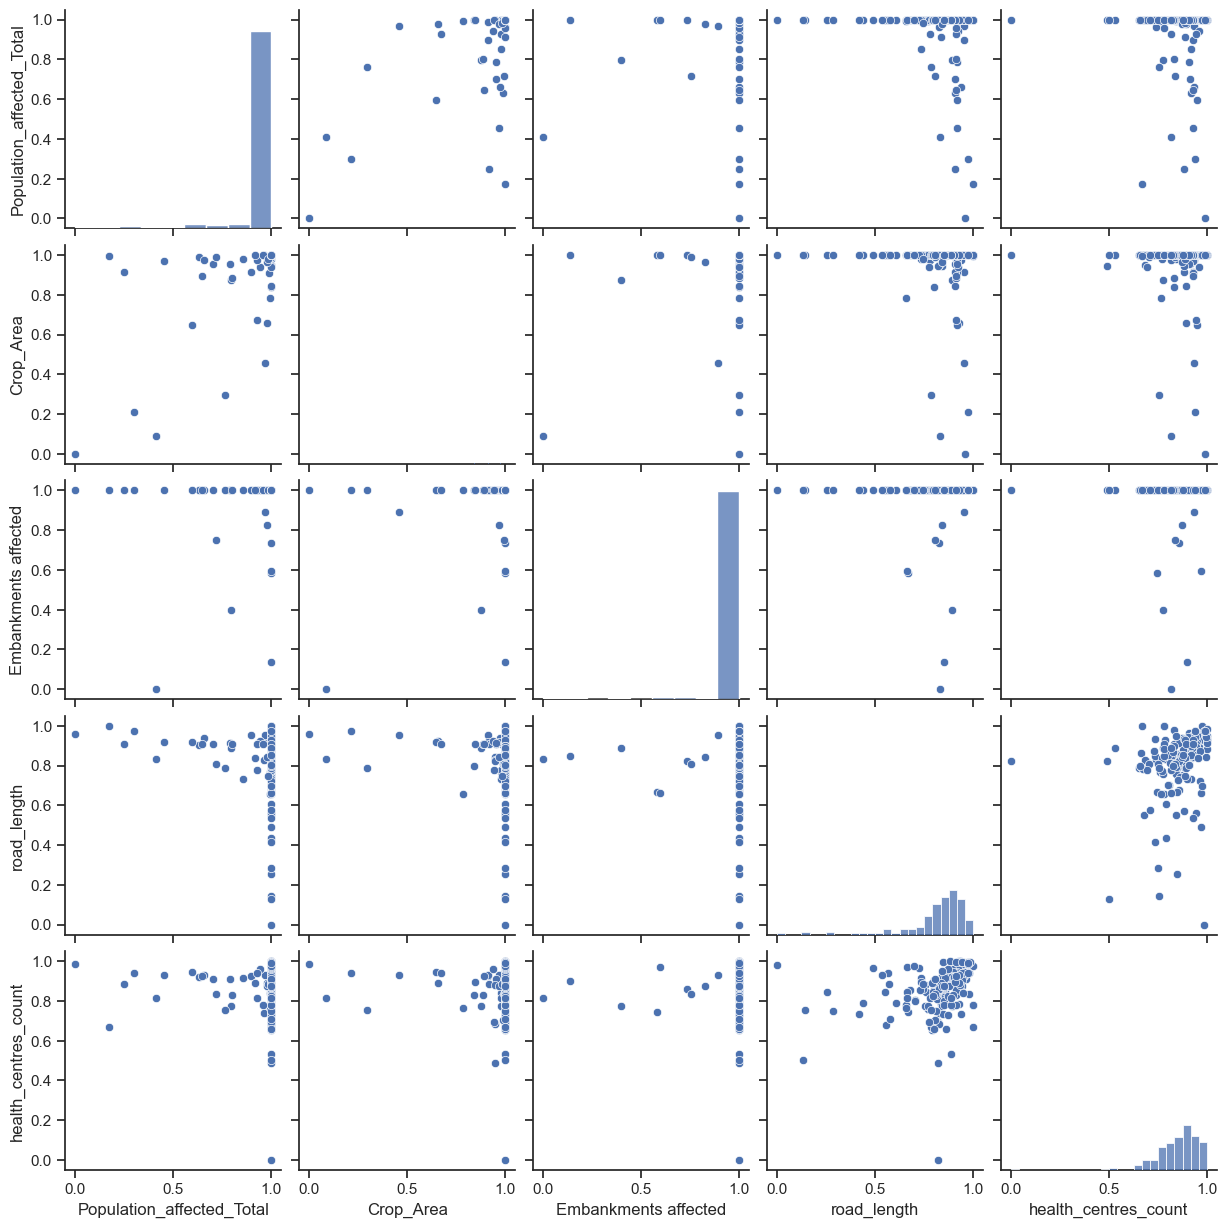

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

envplot = Aug23.filter([
    'Population_affected_Total',
    'Crop_Area',
    'Embankments affected',
    'road_length',
    'health_centres_count',    
],axis=1)
g = sns.pairplot(envplot)
plt.show()

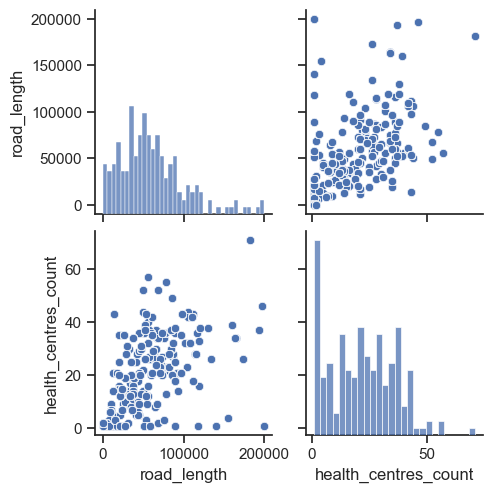

In [37]:

envplot2 = vul_var.filter([
    'Population_affected_Total',
    'Crop_Area',
    'Embankments affected',
    'road_length',
    'health_centres_count',    
],axis=1)
g = sns.pairplot(envplot2)
plt.show()

In [38]:
import matplotlib

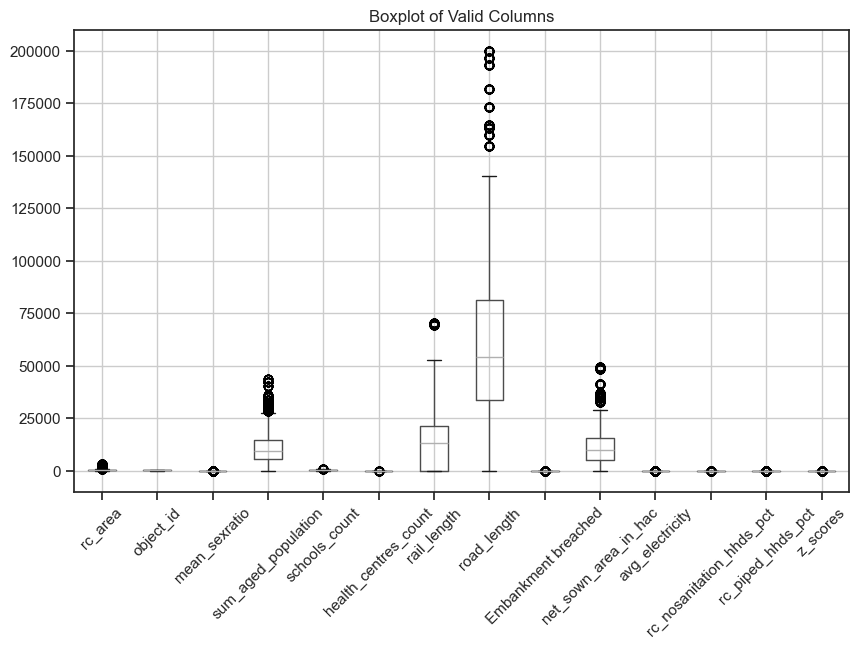

In [39]:
valid_columns = vul_var.select_dtypes(include=['number']).columns

# Plotting boxplot
vul_var[valid_columns].boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Boxplot of Valid Columns')
plt.show()


#matplotlib.pyplot.boxplot(vul_var[column])

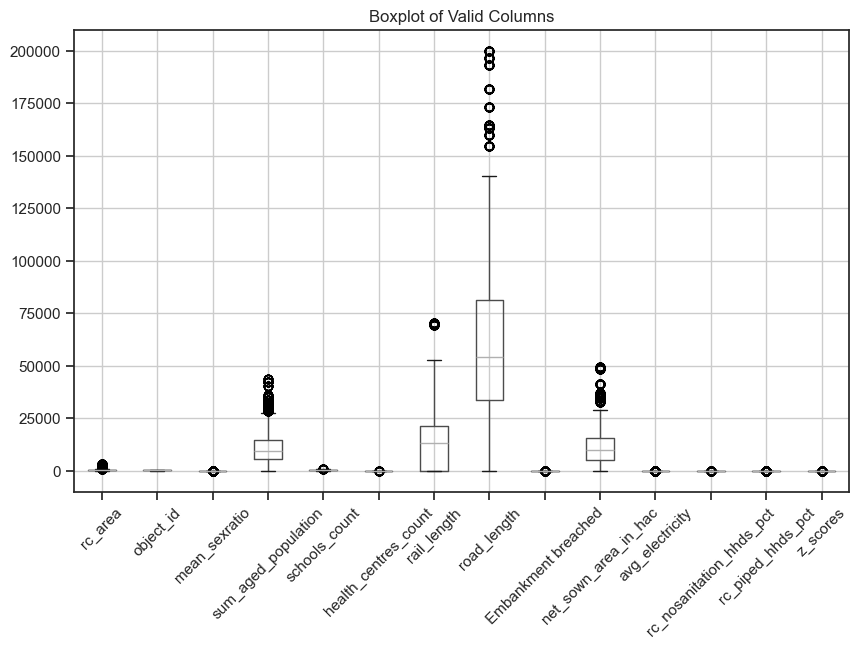

In [40]:
valid_columns_zoom = vul_var.select_dtypes(include=['number']).columns

# Plotting boxplot
vul_var[valid_columns].boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Boxplot of Valid Columns')
plt.show()


#matplotlib.pyplot.boxplot(vul_var[column])

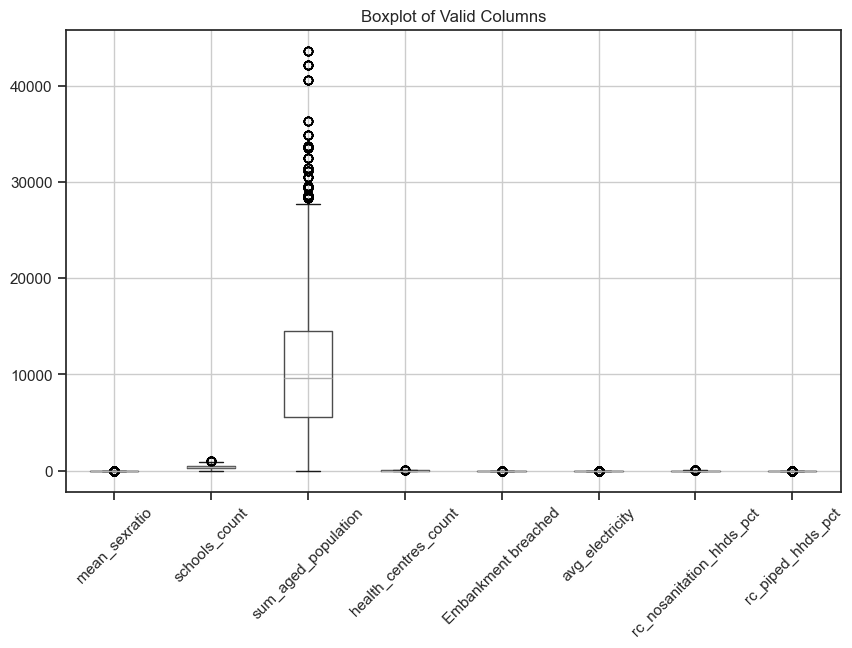

In [41]:
valid_columns_zoom = ['mean_sexratio','schools_count', 'sum_aged_population','health_centres_count','Embankment breached','avg_electricity','rc_nosanitation_hhds_pct','rc_piped_hhds_pct']

# Plotting boxplot
vul_var[valid_columns_zoom].boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.title('Boxplot of Valid Columns')
plt.show()


#matplotlib.pyplot.boxplot(vul_var[column])

In [42]:
vul_var.dtypes

rc_area                       int64
object_id                     int64
revenue_ci_x                 object
timeperiod                   object
mean_sexratio               float64
sum_aged_population         float64
schools_count                 int64
health_centres_count          int64
rail_length                 float64
road_length                 float64
Embankment breached         float64
net_sown_area_in_hac        float64
avg_electricity             float64
rc_nosanitation_hhds_pct    float64
rc_piped_hhds_pct           float64
z_scores                    float64
dtype: object

In [43]:
helem = vul_var.loc[vul_var['revenue_ci_x'] == 'Helem']
helem

,rc_area,object_id,revenue_ci_x,timeperiod,mean_sexratio,sum_aged_population,schools_count,health_centres_count,rail_length,road_length,Embankment breached,net_sown_area_in_hac,avg_electricity,rc_nosanitation_hhds_pct,rc_piped_hhds_pct,z_scores
4292,427,250,Helem,2021_04,0.931810,7615.756299,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404
4293,427,250,Helem,2021_05,0.931810,7615.756299,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404
4294,427,250,Helem,2021_06,0.931810,7615.756299,253,36,20884.443743,44913.331221,2.0,12593.094,8.524032,33.841453,4.290548,2.756437
4295,427,250,Helem,2021_07,0.931810,7615.756299,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404
4296,427,250,Helem,2021_08,0.931810,7615.756299,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404
4297,427,250,Helem,2021_09,0.931810,7615.756299,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404
4298,427,250,Helem,2021_10,0.931810,7615.756299,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404
4299,427,250,Helem,2021_11,0.931810,7615.756299,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404
4300,427,250,Helem,2021_12,0.931810,7615.756299,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404
4301,427,250,Helem,2022_01,0.931703,7859.348145,253,36,20884.443743,44913.331221,0.0,12593.094,8.524032,33.841453,4.290548,-0.104404


In [44]:
biswanath = vul_var.loc[vul_var['revenue_ci_x'] == 'Biswanath']
biswanath

,rc_area,object_id,revenue_ci_x,timeperiod,mean_sexratio,sum_aged_population,schools_count,health_centres_count,rail_length,road_length,Embankment breached,net_sown_area_in_hac,avg_electricity,rc_nosanitation_hhds_pct,rc_piped_hhds_pct,z_scores
4263,1042,249,Biswanath,2021_04,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4264,1042,249,Biswanath,2021_05,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4265,1042,249,Biswanath,2021_06,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4266,1042,249,Biswanath,2021_07,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4267,1042,249,Biswanath,2021_08,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4268,1042,249,Biswanath,2021_09,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4269,1042,249,Biswanath,2021_10,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4270,1042,249,Biswanath,2021_11,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4271,1042,249,Biswanath,2021_12,0.931665,20686.499219,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404
4272,1042,249,Biswanath,2022_01,0.931557,21395.967969,605,38,38819.742901,89578.71678,0.0,22775.07,9.433601,14.835076,2.959702,-0.104404


## MinMaxScaler + Jenkspy Explorations : 
##### Testing Jenks's breaks on points from 2023/08

In [45]:
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import jenkspy


In [46]:
breaks = jenkspy.jenks_breaks(vul_scores['efficiency'], n_classes=5)

print(breaks)

# Add a new column with the assigned bins
vul_scores['vulnerability2'] = pd.cut(vul_scores['efficiency'],
                                                    bins=breaks,
                                                    labels=[5, 4, 3, 2, 1], #Low efficiency = More Vulnerability
                                                    include_lowest=True)

Aug23

[0.7985657858196151, 0.8606000742794059, 0.9048796165030056, 0.9440880262332786, 0.9798637412241874, 1.0000000000000004]


,object_id,district,rc_area,timeperiod,total_tender_awarded_value,SOPD_tenders_awarded_value,SDRF_tenders_awarded_value,RIDF_tenders_awarded_value,LTIF_tenders_awarded_value,CIDF_tenders_awarded_value,...,revenue_ci_y.1,district_3_y.1,net_sown_area_in_hac,avg_electricity,avg_tele,rc_piped_hhds_pct,rc_nosanitation_hhds_pct,total_hhd,distance_from_river,drainage_density
28,101,KOKRAJHAR,1069,2023_08,0.00,0.00,0.0,0.0,0.0,0.0,...,Gossaigaon (Pt),KOKRAJHAR,0.005631,0.814510,2.0,0.958412,0.288936,62424.0,1718.766638,0.000542
57,102,KOKRAJHAR,159,2023_08,0.00,0.00,0.0,0.0,0.0,0.0,...,Bhowraguri,KOKRAJHAR,0.002410,0.882049,2.0,0.998242,0.207729,5047.0,1585.679124,0.000641
86,103,KOKRAJHAR,304,2023_08,0.00,0.00,0.0,0.0,0.0,0.0,...,Dotoma,KOKRAJHAR,0.011439,0.634992,2.0,0.917737,0.288056,39711.0,853.552864,0.000652
115,104,KOKRAJHAR,990,2023_08,27639686.00,0.00,0.0,0.0,0.0,0.0,...,Kokrajhar (Pt),KOKRAJHAR,0.003971,0.624823,3.0,0.851072,0.324846,69115.0,1570.415821,0.000512
144,105,KOKRAJHAR,281,2023_08,0.00,0.00,0.0,0.0,0.0,0.0,...,Bagribari (Pt),KOKRAJHAR,0.000114,0.646074,2.0,1.000000,0.401266,10601.0,6823.791423,0.000538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,277,JORHAT,195,2023_08,0.00,0.00,0.0,0.0,0.0,0.0,...,Jorhat East,JORHAT,0.007519,0.574259,2.0,0.000000,0.139402,53223.0,3103.398970,0.000687
5132,278,CHARAIDEO,394,2023_08,0.00,0.00,0.0,0.0,0.0,0.0,...,Sapekhati,CHARAIDEO,0.002776,0.687460,2.0,0.849643,0.466283,38275.0,5391.150817,0.000581
5161,279,CHARAIDEO,385,2023_08,429277.38,429277.38,0.0,0.0,0.0,0.0,...,Sonari,CHARAIDEO,0.001862,0.634694,2.0,0.691023,0.121060,40393.0,2682.662956,0.000562
5190,280,MAJULI,322,2023_08,0.00,0.00,0.0,0.0,0.0,0.0,...,Ujani Majuli,MAJULI,0.003178,0.628779,3.0,0.907136,0.407305,17201.0,1762.032406,0.000622


In [47]:
vul_scores_efficiency = vul_scores.sort_values('efficiency').reset_index()
vul_scores_vulnerability = vul_scores.sort_values('vulnerability',ascending=False).reset_index()

In [48]:
vul_scores_efficiency['rank_A'] = vul_scores_efficiency.index
vul_scores_vulnerability['rank_B'] = vul_scores_vulnerability.index

merged = vul_scores_efficiency.merge(vul_scores_vulnerability, left_on='index', right_on='index', suffixes=('_A', '_B'))


In [49]:
outliers = merged[merged['rank_A'] != merged['rank_B']]
outliers


,index,object_id_A,district_A,rc_area_A,timeperiod_A,total_tender_awarded_value_A,SOPD_tenders_awarded_value_A,SDRF_tenders_awarded_value_A,RIDF_tenders_awarded_value_A,LTIF_tenders_awarded_value_A,...,avg_tele_B,rc_piped_hhds_pct_B,rc_nosanitation_hhds_pct_B,total_hhd_B,distance_from_river_B,drainage_density_B,efficiency_B,vulnerability_B,vulnerability2_B,rank_B
0,4431,254,HOJAI,873,2023_03,0.0,0.0,0.0,0.0,0.0,...,2.0,2.337523,29.796956,112150.0,7771.489068,0.000514,0.798566,5,5,670
1,4429,254,HOJAI,873,2023_01,0.0,0.0,0.0,0.0,0.0,...,2.0,2.337523,29.796956,112150.0,7771.489068,0.000514,0.798566,5,5,668
2,4432,254,HOJAI,873,2023_04,0.0,0.0,0.0,0.0,0.0,...,2.0,2.337523,29.796956,112150.0,7771.489068,0.000514,0.798566,5,5,671
3,4433,254,HOJAI,873,2023_05,0.0,0.0,0.0,0.0,0.0,...,2.0,2.337523,29.796956,112150.0,7771.489068,0.000514,0.798566,5,5,672
4,4430,254,HOJAI,873,2023_02,0.0,0.0,0.0,0.0,0.0,...,2.0,2.337523,29.796956,112150.0,7771.489068,0.000514,0.798566,5,5,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5215,719,125,BAJALI,41,2023_03,0.0,0.0,0.0,0.0,0.0,...,2.0,14.464100,7.674298,3844.0,1290.618280,0.000700,1.000000,1,1,4416
5216,721,125,BAJALI,41,2023_05,0.0,0.0,0.0,0.0,0.0,...,2.0,14.464100,7.674298,3844.0,1290.618280,0.000700,1.000000,1,1,4418
5217,722,125,BAJALI,41,2023_06,0.0,0.0,0.0,0.0,0.0,...,2.0,14.464100,7.674298,3844.0,1290.618280,0.000700,1.000000,1,1,4419
5218,2927,201,BONGAIGAON,85,2023_07,0.0,0.0,0.0,0.0,0.0,...,2.0,4.042488,7.184591,17856.0,1110.176980,0.000549,1.000000,1,1,4918


In [50]:
Aug23.to_csv('aug23.csv')

In [51]:
bis_aug23 = Aug23.loc[Aug23['revenue_ci_x'] == 'Biswanath']


In [52]:
hel_aug23 = Aug23.loc[Aug23['revenue_ci_x'] == 'Helem']


In [53]:
biswanath_revC = pd.concat([hel_aug23, bis_aug23])
biswanath_revC_t = biswanath_revC.T
biswanath_revC_t

,4320,4291
object_id,250,249
district,BISWANATH,BISWANATH
rc_area,427,1042
timeperiod,2023_08,2023_08
total_tender_awarded_value,0.0,0.0
...,...,...
rc_piped_hhds_pct,0.809624,0.868675
rc_nosanitation_hhds_pct,0.486506,0.211944
total_hhd,30439.0,96004.0
distance_from_river,3442.079443,1611.353592


## Testing contribution of variables using Shapley

In [54]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install DEA

  Using cached DEA-0.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [56]:
import numpy as np
import DEA
import pandas as pd
import os
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import jenkspy
import shap


master_variables = pd.read_csv(r'D:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data\MASTER_VARIABLES.csv')
master_variables_copy = master_variables.copy()

# Per capita variables
master_variables['Population_affected_Total'] = master_variables['Population_affected_Total']/master_variables['sum_population']
master_variables['Total_Animal_Affected'] = master_variables['Total_Animal_Affected']/master_variables['sum_population']

master_variables['Total_House_Fully_Damaged'] = master_variables['Total_House_Fully_Damaged']/master_variables['sum_population']
master_variables['Crop_Area'] = master_variables['Crop_Area']/master_variables['net_sown_area_in_hac']
master_variables['Roads'] = master_variables['Roads']/master_variables['rc_area']
master_variables['Bridge'] = master_variables['Bridge']/master_variables['rc_area']
master_variables['Embankment breached'] = master_variables['Embankment breached']/master_variables['rc_area']


master_variables['sum_aged_population'] = master_variables['sum_aged_population']/master_variables['rc_area']
master_variables['rail_length'] = master_variables['rail_length']/master_variables['rc_area']
master_variables['schools_count'] = master_variables['schools_count']/master_variables['rc_area']
master_variables['health_centres_count'] = master_variables['health_centres_count']/master_variables['rc_area']
master_variables['road_length'] = master_variables['road_length']/master_variables['rc_area']
master_variables['net_sown_area_in_hac'] = master_variables['net_sown_area_in_hac']/master_variables['rc_area']
master_variables['Embankments affected'] = master_variables['Embankments affected']/master_variables['rc_area']

#INPUT VARS
vulnerability_vars = ["mean_sexratio",
                      "sum_aged_population",
                      "schools_count",
                      "health_centres_count",
                      "rail_length",
                      "road_length",
                      "Embankment breached",
                      "net_sown_area_in_hac",
                      "avg_electricity",
                      "rc_nosanitation_hhds_pct",
                      "rc_piped_hhds_pct"]

#OUTPUT VARS
damage_vars = ["Total_Animal_Affected","Population_affected_Total",
                "Crop_Area","Total_House_Fully_Damaged","Embankments affected",
                 "Roads","Bridge"]

vulnerability_df = master_variables[vulnerability_vars + damage_vars + ['timeperiod', 'object_id']]


# Function to assign bins based on breaks
def assign_bin(value):
    for i in range(len(breaks)):
        if value <= breaks[i]:
            return i + 1  # Since bins start from 1
    return len(breaks)  # If value is greater than the last break

vulnerability_df_months = []
for month in tqdm(vulnerability_df.timeperiod.unique()):
    vulnerability_df_month = vulnerability_df[vulnerability_df.timeperiod == month]
    vulnerability_df_month = vulnerability_df_month.set_index('object_id')
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    # Fit scaler to the data and transform it
    vulnerability_df_month[vulnerability_vars + damage_vars] = scaler.fit_transform(vulnerability_df_month[vulnerability_vars + damage_vars])

    # Reversing a few input vars (as more input should be more vulnerability)
    vulnerability_df_month['schools_count'] = 1 - vulnerability_df_month['schools_count']
    vulnerability_df_month['health_centres_count'] = 1 - vulnerability_df_month['health_centres_count']
    vulnerability_df_month['rail_length'] = 1 - vulnerability_df_month['rail_length']
    vulnerability_df_month['road_length'] = 1 - vulnerability_df_month['road_length']
    vulnerability_df_month['avg_electricity'] = 1 - vulnerability_df_month['avg_electricity']
    vulnerability_df_month['rc_piped_hhds_pct'] = 1 - vulnerability_df_month['rc_piped_hhds_pct']
    
    # Reversing all output vars (as more output should be less damage)
    vulnerability_df_month[damage_vars] = 1 - vulnerability_df_month[damage_vars]

    # Input dict
    X = vulnerability_df_month[vulnerability_vars].T.to_dict('list')

    # Output dict
    y = vulnerability_df_month[damage_vars].T.to_dict('list')

    DMU = list(vulnerability_df_month.index.astype(int))

    df = DEA.CRS(DMU, X, y, orientation="input", dual=False)


    vulnerability_df_month = vulnerability_df_month.reset_index().merge(df,
                                                          left_on = 'object_id',
                                                          right_on = 'DMU')
    
    # Perform Natural Jenks classification with 5 classes
    breaks = jenkspy.jenks_breaks(vulnerability_df_month['efficiency'], n_classes=5)

    #print(breaks)

    # Add a new column with the assigned bins
    vulnerability_df_month['vulnerability'] = pd.cut(vulnerability_df_month['efficiency'],
                                                     bins=breaks,
                                                     labels=[5, 4, 3, 2, 1], #Low efficiency = More Vulnerability
                                                     include_lowest=True)
    
    vulnerability_df_months.append(vulnerability_df_month)

vulnerability = pd.concat(vulnerability_df_months)

master_variables = master_variables_copy.merge(vulnerability[['timeperiod', 'object_id', 'efficiency', 'vulnerability']],
                       on = ['timeperiod', 'object_id'])

master_variables.to_csv(r'D:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data-audit/factor_scores_l1_vulnerability.csv', index=False)

inputs = master_variables[vulnerability_vars]
#outputs = np.array([[15, 20], [10, 12], [8, 10]])
outputs = master_variables[damage_vars]
efficiency_scores = master_variables['vulnerability']

explainer = shap.Explainer(df, vulnerability_df)
shap_values = explainer(vulnerability_df)

# Visualize the Shapley values
shap.summary_plot(shap_values, vulnerability_vars)

d:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\.conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/29 [00:00<?, ?it/s]

Restricted license - for non-production use only - expires 2025-11-24


100%|██████████| 29/29 [01:22<00:00,  2.85s/it]


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model:        DMU  efficiency
0    101.0    0.887313
1    102.0    1.000000
2    103.0    0.980973
3    104.0    0.908611
4    105.0    1.000000
..     ...         ...
175  277.0    1.000000
176  278.0    0.954518
177  279.0    0.997306
178  280.0    0.985950
179  281.0    1.000000

[180 rows x 2 columns]

In [ ]:
import numpy as np
import shap
import pandas as pd

vul_scores = pd.read_csv(r'D:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data\factor_scores_l1_vulnerability.csv')

vulnerability_vars = ["mean_sexratio",
          "sum_aged_population",
          "schools_count",
          "health_centres_count",
          "rail_length",
          "road_length",
          "Embankment breached",
          "net_sown_area_in_hac",
          "avg_electricity",
          "rc_nosanitation_hhds_pct",
          "rc_piped_hhds_pct"]

damage_vars = ["Total_Animal_Affected","Population_affected_Total",
                "Crop_Area","Total_House_Fully_Damaged","Embankments affected",
                 "Roads","Bridge"]

#inputs = np.array([[5, 7, 9], [3, 4, 6], [2, 5, 8]])
inputs = vul_scores[vulnerability_vars]
#outputs = np.array([[15, 20], [10, 12], [8, 10]])
outputs = vul_scores[damage_vars]
efficiency_scores = vul_scores['vulnerability']

vulnerability_df = master_variables[vulnerability_vars + damage_vars + ['timeperiod', 'object_id']]

vulnerability_df_months = []
for month in tqdm(vulnerability_df.timeperiod.unique()):
    vulnerability_df_month = vulnerability_df[vulnerability_df.timeperiod == month]
    vulnerability_df_month = vulnerability_df_month.set_index('object_id')
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    # Fit scaler to the data and transform it
    vulnerability_df_month[vulnerability_vars + damage_vars] = scaler.fit_transform(vulnerability_df_month[vulnerability_vars + damage_vars])

    # Reversing a few input vars (as more input should be more vulnerability)
    vulnerability_df_month['schools_count'] = 1 - vulnerability_df_month['schools_count']
    vulnerability_df_month['health_centres_count'] = 1 - vulnerability_df_month['health_centres_count']
    vulnerability_df_month['rail_length'] = 1 - vulnerability_df_month['rail_length']
    vulnerability_df_month['road_length'] = 1 - vulnerability_df_month['road_length']
    vulnerability_df_month['avg_electricity'] = 1 - vulnerability_df_month['avg_electricity']
    vulnerability_df_month['rc_piped_hhds_pct'] = 1 - vulnerability_df_month['rc_piped_hhds_pct']
    
    # Reversing all output vars (as more output should be less damage)
    vulnerability_df_month[damage_vars] = 1 - vulnerability_df_month[damage_vars]

    # Input dict
    X = vulnerability_df_month[vulnerability_vars].T.to_dict('list')

    # Output dict
    y = vulnerability_df_month[damage_vars].T.to_dict('list')

    DMU = list(vulnerability_df_month.index.astype(int))

    df = DEA.CRS(DMU, X, y, orientation="input", dual=False)


    vulnerability_df_month = vulnerability_df_month.reset_index().merge(df,
                                                          left_on = 'object_id',
                                                          right_on = 'DMU')


master_variables = master_variables_copy.merge(vulnerability[['timeperiod', 'object_id', 'efficiency']],
                       on = ['timeperiod', 'object_id'])


# Combine inputs and outputs into a single dataframe
data = np.hstack((inputs, outputs))
columns = [vulnerability_vars + damage_vars]
df = pd.DataFrame(data, columns=columns)



# Function to predict efficiency score (for demonstration purposes, a simple linear model is used here)
def model(X):
    # A simple linear combination of inputs and outputs
    return np.dot(X, [0.1, 0.2, 0.3, 0.4, 0.5])

# Use SHAP to explain the model's predictions
explainer = shap.Explainer(model, df)
shap_values = explainer(df)

# Visualize the Shapley values
shap.summary_plot(shap_values, df)
#shap.waterfall_plot(shap_values[0])


ValueError: shapes (2160,18) and (5,) not aligned: 18 (dim 1) != 5 (dim 0)

## Testing DEA on different buckets: by district then by revenue circle

In [ ]:
import numpy as np
import DEA
import pandas as pd
import os
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import jenkspy


In [ ]:
master_variables = pd.read_csv(r'D:\CivicDataLabs_IDS-DRR\IDS-DRR_Github\IDS-DRR-Assam\RiskScoreModel\data\MASTER_VARIABLES.csv')
master_variables_copy = master_variables.copy()

# Per capita variables
master_variables['Population_affected_Total'] = master_variables['Population_affected_Total']/master_variables['sum_population']
master_variables['Total_Animal_Affected'] = master_variables['Total_Animal_Affected']/master_variables['sum_population']

master_variables['Total_House_Fully_Damaged'] = master_variables['Total_House_Fully_Damaged']/master_variables['sum_population']
master_variables['Crop_Area'] = master_variables['Crop_Area']/master_variables['net_sown_area_in_hac']
master_variables['Roads'] = master_variables['Roads']/master_variables['rc_area']
master_variables['Bridge'] = master_variables['Bridge']/master_variables['rc_area']
master_variables['Embankment breached'] = master_variables['Embankment breached']/master_variables['rc_area']


master_variables['sum_aged_population'] = master_variables['sum_aged_population']/master_variables['rc_area']
master_variables['rail_length'] = master_variables['rail_length']/master_variables['rc_area']
master_variables['schools_count'] = master_variables['schools_count']/master_variables['rc_area']
master_variables['health_centres_count'] = master_variables['health_centres_count']/master_variables['rc_area']
master_variables['road_length'] = master_variables['road_length']/master_variables['rc_area']
master_variables['net_sown_area_in_hac'] = master_variables['net_sown_area_in_hac']/master_variables['rc_area']
master_variables['Embankments affected'] = master_variables['Embankments affected']/master_variables['rc_area']

#INPUT VARS
vulnerability_vars = ["mean_sexratio",
                      "sum_aged_population",
                      "schools_count",
                      "health_centres_count",
                      "rail_length",
                      "road_length",
                      "Embankment breached",
                      "net_sown_area_in_hac",
                      "avg_electricity",
                      "rc_nosanitation_hhds_pct",
                      "rc_piped_hhds_pct"]

#OUTPUT VARS
damage_vars = ["Total_Animal_Affected","Population_affected_Total",
                "Crop_Area","Total_House_Fully_Damaged","Embankments affected",
                 "Roads","Bridge"]

vulnerability_df = master_variables[vulnerability_vars + damage_vars + ['timeperiod','object_id','district']]


In [ ]:
vulnerability_biswanath = vulnerability_df.loc[vulnerability_df['district'] == 'BISWANATH']
vulnerability_biswanath


,mean_sexratio,sum_aged_population,schools_count,health_centres_count,rail_length,road_length,Embankment breached,net_sown_area_in_hac,avg_electricity,rc_nosanitation_hhds_pct,...,Total_Animal_Affected,Population_affected_Total,Crop_Area,Total_House_Fully_Damaged,Embankments affected,Roads,Bridge,timeperiod,object_id,district
4263,0.931665,19.852686,0.580614,0.036468,37.255032,85.968058,0.000000,21.857073,9.433601,14.835076,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2021_04,249,BISWANATH
4264,0.931665,19.852686,0.580614,0.036468,37.255032,85.968058,0.000000,21.857073,9.433601,14.835076,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2021_05,249,BISWANATH
4265,0.931665,19.852686,0.580614,0.036468,37.255032,85.968058,0.000000,21.857073,9.433601,14.835076,...,0.000000,0.002593,0.006586,0.0,0.000000,0.000960,0.000000,2021_06,249,BISWANATH
4266,0.931665,19.852686,0.580614,0.036468,37.255032,85.968058,0.000000,21.857073,9.433601,14.835076,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2021_07,249,BISWANATH
4267,0.931665,19.852686,0.580614,0.036468,37.255032,85.968058,0.000000,21.857073,9.433601,14.835076,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000960,0.000000,2021_08,249,BISWANATH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345,0.931582,21.209249,1.378981,0.082803,46.390616,226.493611,0.000000,114.395659,8.727492,36.703431,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2023_04,251,BISWANATH
4346,0.931582,21.209249,1.378981,0.082803,46.390616,226.493611,0.000000,114.395659,8.727492,36.703431,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2023_05,251,BISWANATH
4347,0.931582,21.209249,1.378981,0.082803,46.390616,226.493611,0.012739,114.395659,8.727492,36.703431,...,0.626245,0.030351,0.017199,0.0,0.082803,0.041401,0.003185,2023_06,251,BISWANATH
4348,0.931582,21.209249,1.378981,0.082803,46.390616,226.493611,0.009554,114.395659,8.727492,36.703431,...,0.710724,0.235125,0.014198,0.0,0.022293,0.022293,0.006369,2023_07,251,BISWANATH


In [ ]:
vulnerability_biswanath = vulnerability_df.loc[vulnerability_df['district'] == 'BISWANATH']
vulnerability_biswanath

# Function to assign bins based on breaks
def assign_bin(value):
    for i in range(len(breaks)):
        if value <= breaks[i]:
            return i + 1  # Since bins start from 1
    return len(breaks)  # If value is greater than the last break


#vulnerability_df_hist = vulnerability_hist[vulnerability_df.timeperiod == month]
#vulnerability_df_month = vulnerability_df_month.set_index('object_id')
vulnerability_biswanath = vulnerability_biswanath.set_index('object_id')

# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Fit scaler to the data and transform it
vulnerability_biswanath[vulnerability_vars + damage_vars] = scaler.fit_transform(vulnerability_biswanath[vulnerability_vars + damage_vars])

# Reversing a few input vars (as more input should be more vulnerability)
vulnerability_biswanath['schools_count'] = 1 - vulnerability_biswanath['schools_count']
vulnerability_biswanath['health_centres_count'] = 1 - vulnerability_biswanath['health_centres_count']
vulnerability_biswanath['rail_length'] = 1 - vulnerability_biswanath['rail_length']
vulnerability_biswanath['road_length'] = 1 - vulnerability_biswanath['road_length']
vulnerability_biswanath['avg_electricity'] = 1 - vulnerability_biswanath['avg_electricity']
vulnerability_biswanath['rc_piped_hhds_pct'] = 1 - vulnerability_biswanath['rc_piped_hhds_pct']

# Reversing all output vars (as more output should be less damage)
vulnerability_biswanath[damage_vars] = 1 - vulnerability_biswanath[damage_vars]

#vulnerability_biswanath['object_id'] = vulnerability_biswanath['object_id'].astype(int)
# Input dict
X = vulnerability_biswanath[vulnerability_vars].T.to_dict('list')

# Output dict
y = vulnerability_biswanath[damage_vars].T.to_dict('list')

DMU = list(vulnerability_biswanath.index.astype(int))

df = DEA.CRS(DMU, X, y, orientation="input", dual=False)

vulnerability_biswanath = vulnerability_biswanath.reset_index().merge(df,
                                                        left_on= 'object_id',
                                                        right_on = 'DMU')
vulnerability_biswanath.drop_duplicates(subset=['timeperiod', 'object_id'], keep=False)
# Perform Natural Jenks classification with 5 classes
breaks = jenkspy.jenks_breaks(vulnerability_biswanath['efficiency'], n_classes=5)
#print(breaks)

# Add a new column with the assigned bins
vulnerability_biswanath['vulnerability'] = pd.cut(vulnerability_biswanath['efficiency'],
                                                    bins=breaks,
                                                    labels=[5, 4, 3, 2, 1], #Low efficiency = More Vulnerability
                                                    include_lowest=True, #duplicates='drop'
                                                    )

vulnerability_biswanath.append(vulnerability_biswanath)

vulnerability = pd.concat(vulnerability_biswanath)


C:\Users\saura\AppData\Local\Temp\ipykernel_15000\2452161368.py:34: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  X = vulnerability_biswanath[vulnerability_vars].T.to_dict('list')
C:\Users\saura\AppData\Local\Temp\ipykernel_15000\2452161368.py:37: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  y = vulnerability_biswanath[damage_vars].T.to_dict('list')


ValueError: Number of class have to be an integer greater than or equal to 1 and smaller than or equal to the number of unique values to use

In [ ]:
vulnerability_biswanath

,object_id,mean_sexratio,sum_aged_population,schools_count,health_centres_count,rail_length,road_length,Embankment breached,net_sown_area_in_hac,avg_electricity,...,Population_affected_Total,Crop_Area,Total_House_Fully_Damaged,Embankments affected,Roads,Bridge,timeperiod,district,DMU,efficiency
0,249,0.597132,0.596990,1.0,1.000000,1.000000,1.0,0.000000,0.0,0.000000,...,1.000000,1.000000,1.0,1.000000,1.0,1.0,2021_04,BISWANATH,249.0,1.0
1,249,0.597132,0.596990,1.0,1.000000,1.000000,1.0,0.000000,0.0,0.000000,...,1.000000,1.000000,1.0,1.000000,1.0,1.0,2021_04,BISWANATH,249.0,1.0
2,249,0.597132,0.596990,1.0,1.000000,1.000000,1.0,0.000000,0.0,0.000000,...,1.000000,1.000000,1.0,1.000000,1.0,1.0,2021_04,BISWANATH,249.0,1.0
3,249,0.597132,0.596990,1.0,1.000000,1.000000,1.0,0.000000,0.0,0.000000,...,1.000000,1.000000,1.0,1.000000,1.0,1.0,2021_04,BISWANATH,249.0,1.0
4,249,0.597132,0.596990,1.0,1.000000,1.000000,1.0,0.000000,0.0,0.000000,...,1.000000,1.000000,1.0,1.000000,1.0,1.0,2021_04,BISWANATH,249.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,251,0.367083,0.998466,0.0,0.031492,0.216144,0.0,0.388535,1.0,0.776312,...,0.677403,0.975614,1.0,0.961538,1.0,1.0,2023_08,BISWANATH,251.0,1.0
2519,251,0.367083,0.998466,0.0,0.031492,0.216144,0.0,0.388535,1.0,0.776312,...,0.677403,0.975614,1.0,0.961538,1.0,1.0,2023_08,BISWANATH,251.0,1.0
2520,251,0.367083,0.998466,0.0,0.031492,0.216144,0.0,0.388535,1.0,0.776312,...,0.677403,0.975614,1.0,0.961538,1.0,1.0,2023_08,BISWANATH,251.0,1.0
2521,251,0.367083,0.998466,0.0,0.031492,0.216144,0.0,0.388535,1.0,0.776312,...,0.677403,0.975614,1.0,0.961538,1.0,1.0,2023_08,BISWANATH,251.0,1.0


In [ ]:
# Function to assign bins based on breaks
def assign_bin(value):
    for i in range(len(breaks)):
        if value <= breaks[i]:
            return i + 1  # Since bins start from 1
    return len(breaks)  # If value is greater than the last break


vulnerability_df_hist =  []
for district in vulnerability_df.district:
    for rc in vulnerability_df.object_id:
        vulnerability_df_hist = vulnerability_df[vulnerability_df.object_id == rc]
        vulnerability_df_hist = vulnerability_df_hist.set_index('object_id')



vulnerability_df_months = []
for month in tqdm(vulnerability_df.timeperiod.unique()):
    vulnerability_df_month = vulnerability_df[vulnerability_df.timeperiod == month]
    vulnerability_df_month = vulnerability_df_month.set_index('object_id')
    # Initialize MinMaxScaler
    scaler = MinMaxScaler()
    # Fit scaler to the data and transform it
    vulnerability_df_month[vulnerability_vars + damage_vars] = scaler.fit_transform(vulnerability_df_month[vulnerability_vars + damage_vars])

    # Reversing a few input vars (as more input should be more vulnerability)
    vulnerability_df_month['schools_count'] = 1 - vulnerability_df_month['schools_count']
    vulnerability_df_month['health_centres_count'] = 1 - vulnerability_df_month['health_centres_count']
    vulnerability_df_month['rail_length'] = 1 - vulnerability_df_month['rail_length']
    vulnerability_df_month['road_length'] = 1 - vulnerability_df_month['road_length']
    vulnerability_df_month['avg_electricity'] = 1 - vulnerability_df_month['avg_electricity']
    vulnerability_df_month['rc_piped_hhds_pct'] = 1 - vulnerability_df_month['rc_piped_hhds_pct']
    
    # Reversing all output vars (as more output should be less damage)
    vulnerability_df_month[damage_vars] = 1 #- vulnerability_df_month[damage_vars]

    # Input dict
    X = vulnerability_df_month[vulnerability_vars].T.to_dict('list')

    # Output dict
    y = vulnerability_df_month[damage_vars].T.to_dict('list')

    DMU = list(vulnerability_df_month.index.astype(int))

    df = DEA.CRS(DMU, X, y, orientation="input", dual=False)


    vulnerability_df_month = vulnerability_df_month.reset_index().merge(df,
                                                          left_on = 'object_id',
                                                          right_on = 'DMU')
    
    # Perform Natural Jenks classification with 5 classes
    breaks = jenkspy.jenks_breaks(vulnerability_df_month['efficiency'], n_classes=5)

    #print(breaks)

    # Add a new column with the assigned bins
    vulnerability_df_month['vulnerability'] = pd.cut(vulnerability_df_month['efficiency'],
                                                     bins=breaks,
                                                     labels=[5, 4, 3, 2, 1], #Low efficiency = More Vulnerability
                                                     include_lowest=True)
    
    vulnerability_df_months.append(vulnerability_df_month)

vulnerability = pd.concat(vulnerability_df_months)


In [ ]:


master_variables = master_variables_copy.merge(vulnerability[['timeperiod', 'object_id', 'efficiency', 'vulnerability']],
                       on = ['timeperiod', 'object_id'])

master_variables.to_csv(os.getcwd()+'/RiskScoreModel/data/factor_scores_l1_vulnerability_nodamages.csv', index=False)


